# Avacado Project

# Project Description:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

**Some relevant columns in the dataset:**

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

**Inspiration /Label**

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression Do both tasks in the same .ipynb file and submit at single file.


# Importing All the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
%matplotlib inline
import pickle
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

### Loading Dataset

In [2]:
df = pd.read_csv("Avacado.csv")

In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Downloaded the Zip file from https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip  and then extracted the CSV file on my local computer after which I imported the entire dataset on this Jupyter Notebook with the help of pandas.

In [4]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

Checking the contents of our dataset where it shows that we have 18249 rows and 14 columns. However the first column named "Unnamed" is completely useless and needs to be deleted.

Now as per our given problem statement we see that Avergae Price is the column which needs to be predicted making it our label. Since the data present in our label is in continous format this turns out to be a Regression problem!

Also the feature columns that we have are not all in numerical format and while building our machine learning model object datatypes are not acceptable. 

# Case-I:  Prediction Based On Average Price

# EDA(Exploratory Data Analysis)

In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)

We have removed the "Unnamed" column from our dataset now.

In [7]:
df.shape

(18249, 13)

Here we see that the shape of our dataset has changed to 18249 rows and 13 columns.

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Here we are taking a look at all the columns that are present in our dataset starting from Date - The date of the observation, Average Price - The average price of a single avocado, Total Volume - Total number of avocados sold, 4046 - Total number of avocados with PLU 4046 sold, 4225 - Total number of avocados with PLU 4225 sold, 4770 - Total number of avocados with PLU 4770 sold, Total Bags - Total number of bags that were given out, Small Bags - Total number of small bags that were given out, Large Bags - Total number of large bags that were given out, XLarge Bags - Total number of extra large bags that were given out, Type - Whether it is conventional or organic, Year - The year information and Region - The city or region of the observation.

We may need to separate or bifurcate few columns depending on it's possibilities and rename them accordingly too.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


The info method provides us insights such as the data type of our columns and whether we have any null values present in our dataset or not. It looks like we do not have any null values but we saw "0.0" values present in the columns so we may have to either keep it the same way, treat it by using mean/mode option or delete it completely.

There are 9 columns in our dataset with float values, One column with integer value and Three columns with object data type.

### **Checking for Null Values:**

In [10]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### **Checking for Null Values By Visualization using HeatMap**

<AxesSubplot:>

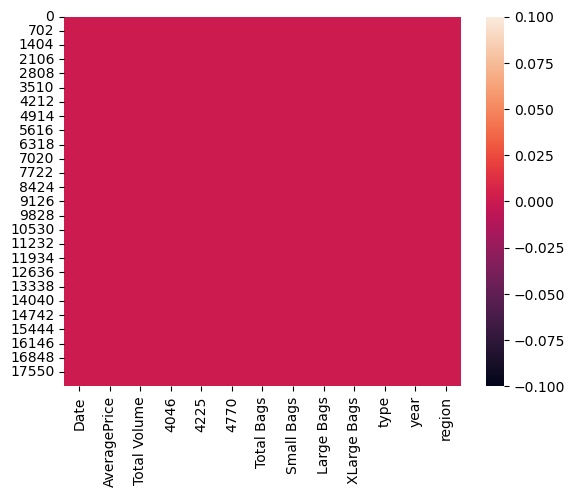

In [11]:
sns.heatmap(df.isnull())

We were simply cross verifying for null values and luckily we do not have any missing data that needs to be treated.

### Changing Date columns Datatype and creat saperate columns for each

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
#df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [19]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  month  day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

In [20]:
df.tail()

Date  AveragePrice  Total Volume     4046     4225    4770  \
18244 2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  month  day  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7

We have separated the Date column into 3 columns namely the Year, Month and Day option so that we can remove Date the object datatype column and year that is already present in Date so we are avoiding duplicate columns.

In [22]:
df.drop(['Date'], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


### Statistical Analysis of Data

In [25]:
df.describe().T

count           mean           std      min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   
month         18249.0       6.177215  3.534130e+00     1.00      3.00   
day           18249.0      15.662612  8.776281e+00     1.00      8.00   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00  
month              6.00       9.00        12.00  
day               16.00      23.00        31.00

Uisng the describe method in transpose format we are able to see information about numerical columns since onject data types are ignored in this function. The count columns again confirms of our dataset having no missing values.

We do have zero values present in columns 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags but they seem to be valid since there is a possibility of presence of a legitimate zero value.

**Observation:**

Above statistics data show that their multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction

Also, number of rows in each column are same, means there are no null values in the data set.
Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other.
Most of the column statistics data are near to 0 values.
By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

In [26]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
month              12
day                31
dtype: int64

All the unique values present in each column are segregated and listed here. This gives us an insight on how many categorical options like type and year are present and how many simply have continous data present in them.

# Visualization

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

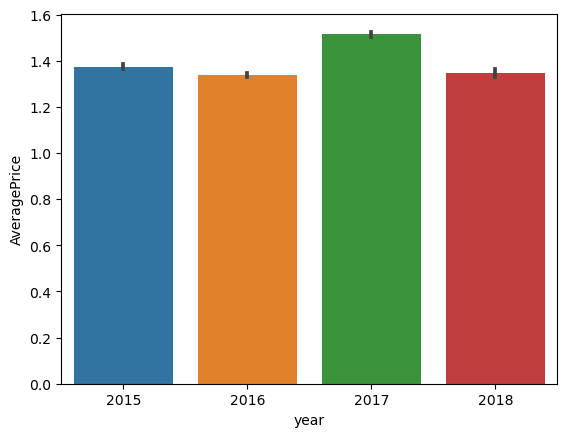

In [27]:
#checking ratio of year and price 
sns.barplot(x='year',y='AveragePrice',data=df)

**Observation:**

by seeing this it is known that the price was highest in 2017

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

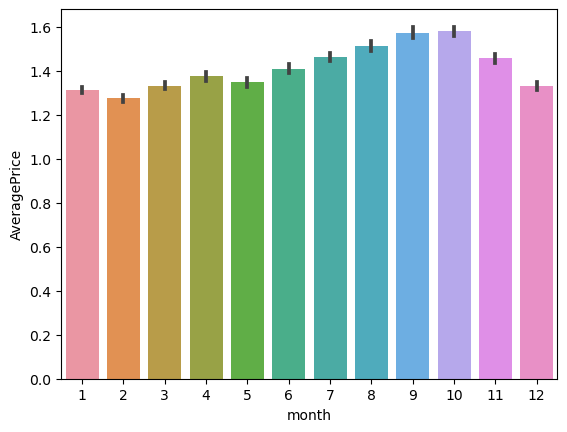

In [28]:
#checking ratio of month and price
sns.barplot(x='month',y='AveragePrice',data=df)

**Observation:**

* Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.
* September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.

**Ploting Lineplot:**

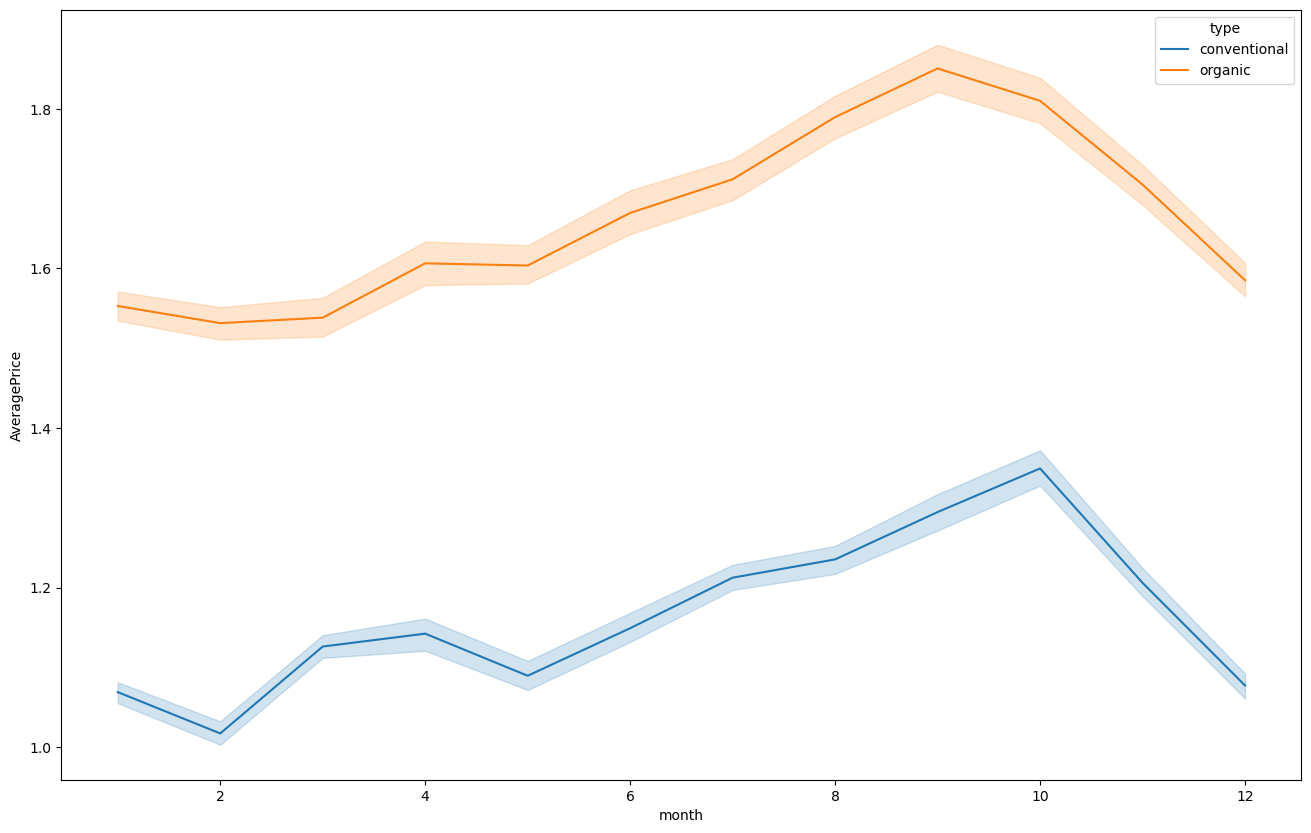

In [29]:
plt.figure(figsize=(16,10))
sns.lineplot(x='month',y='AveragePrice',data=df,hue='type')
plt.show()

**Observation:**

* There is hike between month 8–10 of both type of avocado both for conventional and organic type of avocado.
* Also, the conventional type of avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decrease and so on.

### Ploting histplot for univariate analysis

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

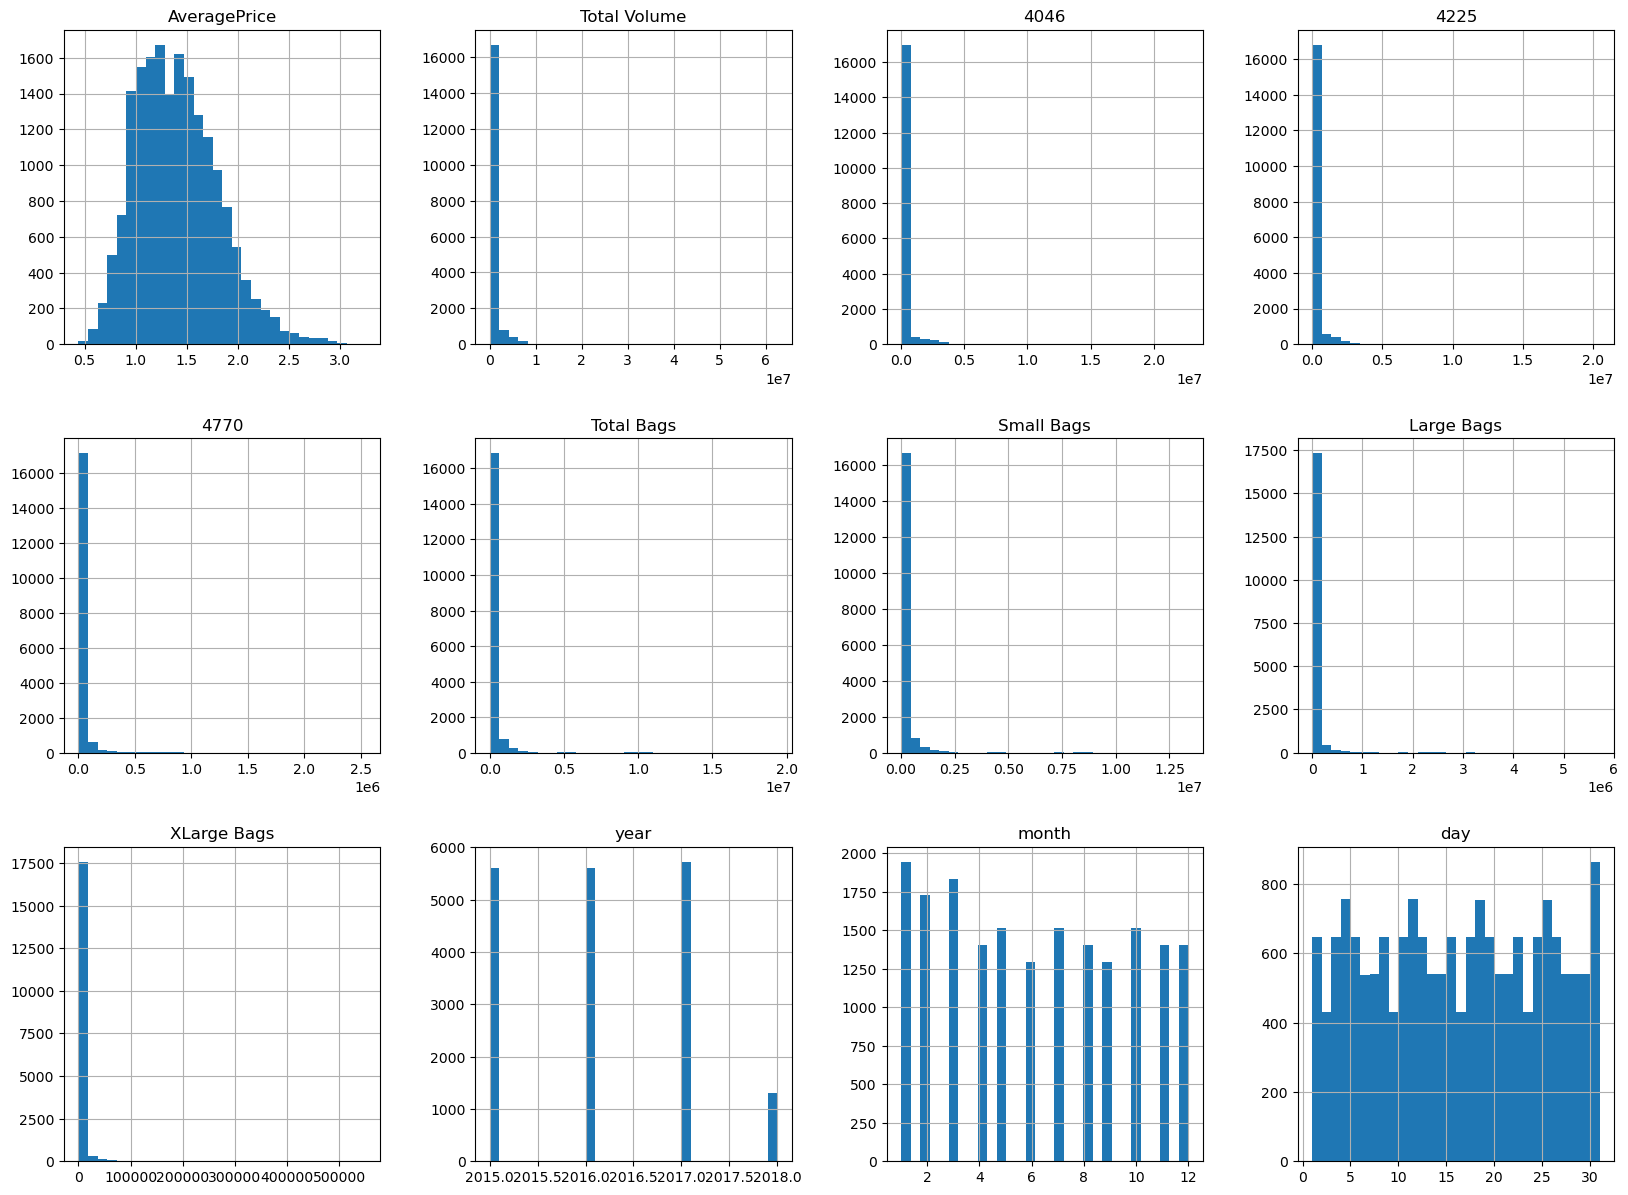

In [30]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

* Average price column is normally distributing over the histogram.
* Rest of the data are not much varying in term of numbers, so they are almost left skewed data
* To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

### Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


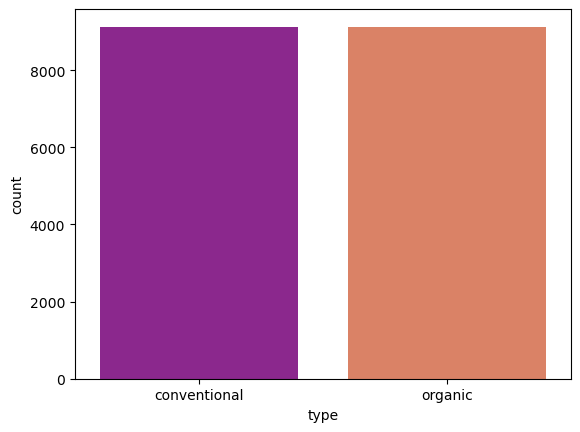

In [31]:
print(df['type'].value_counts())
sns.countplot(x='type', data=df, palette="plasma")
plt.show()

In the "type" column we have data points for conventional and organic avacados.

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


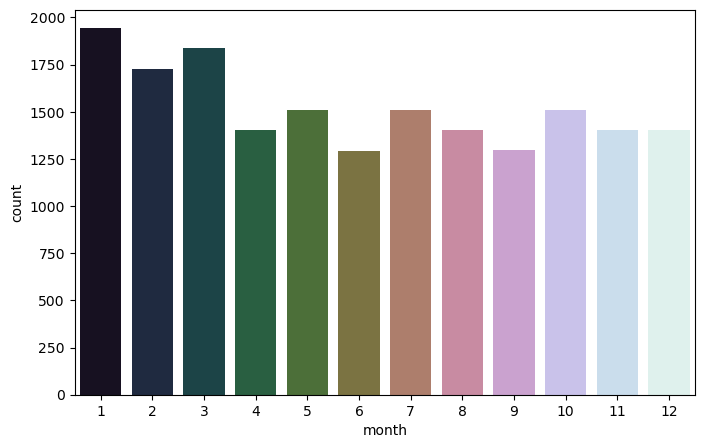

In [34]:
print(df['month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='month', data=df, palette="cubehelix")
plt.show()

In the "Month" column we can see the least datapoints in the month of June that is number 6 and the highest value concentration is present in the month of January that is number 1.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

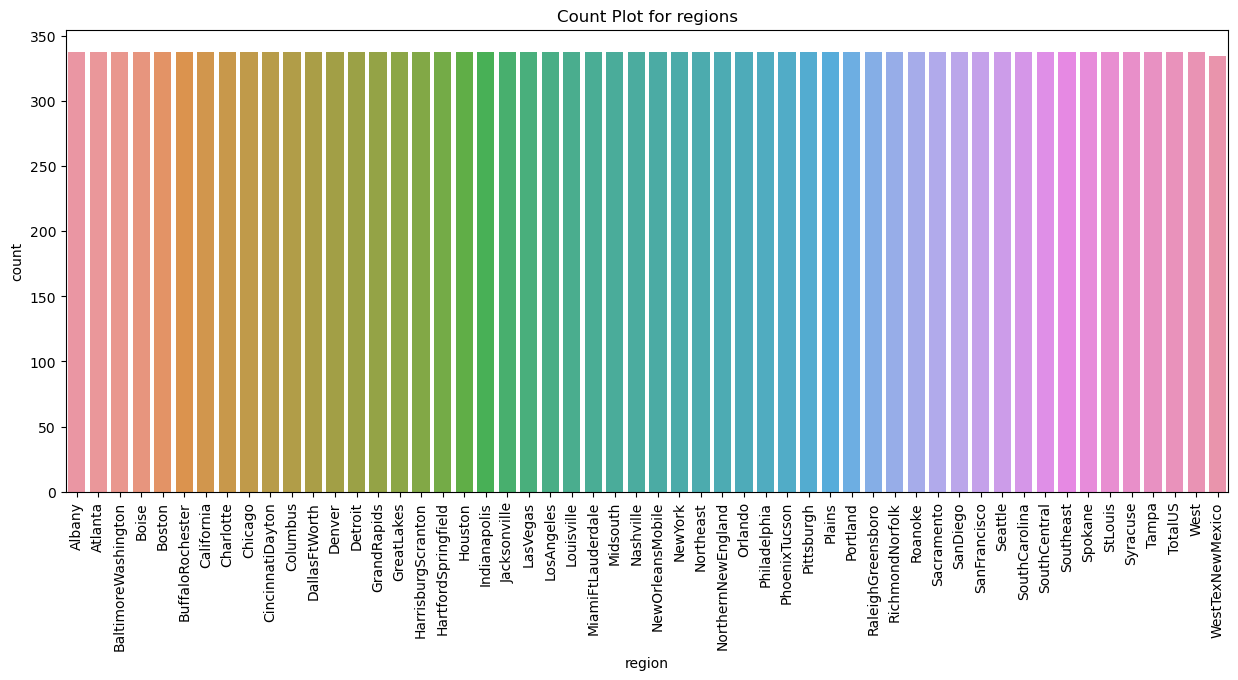

In [37]:
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

In the "region" column we can see that the data points for almost all the values are same except WestTexNewMexico region which is a bit less than the others present in the column.

**Separate numerical and categorical columns for better visualization:**

In [38]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

### Plotting Distribution Plot

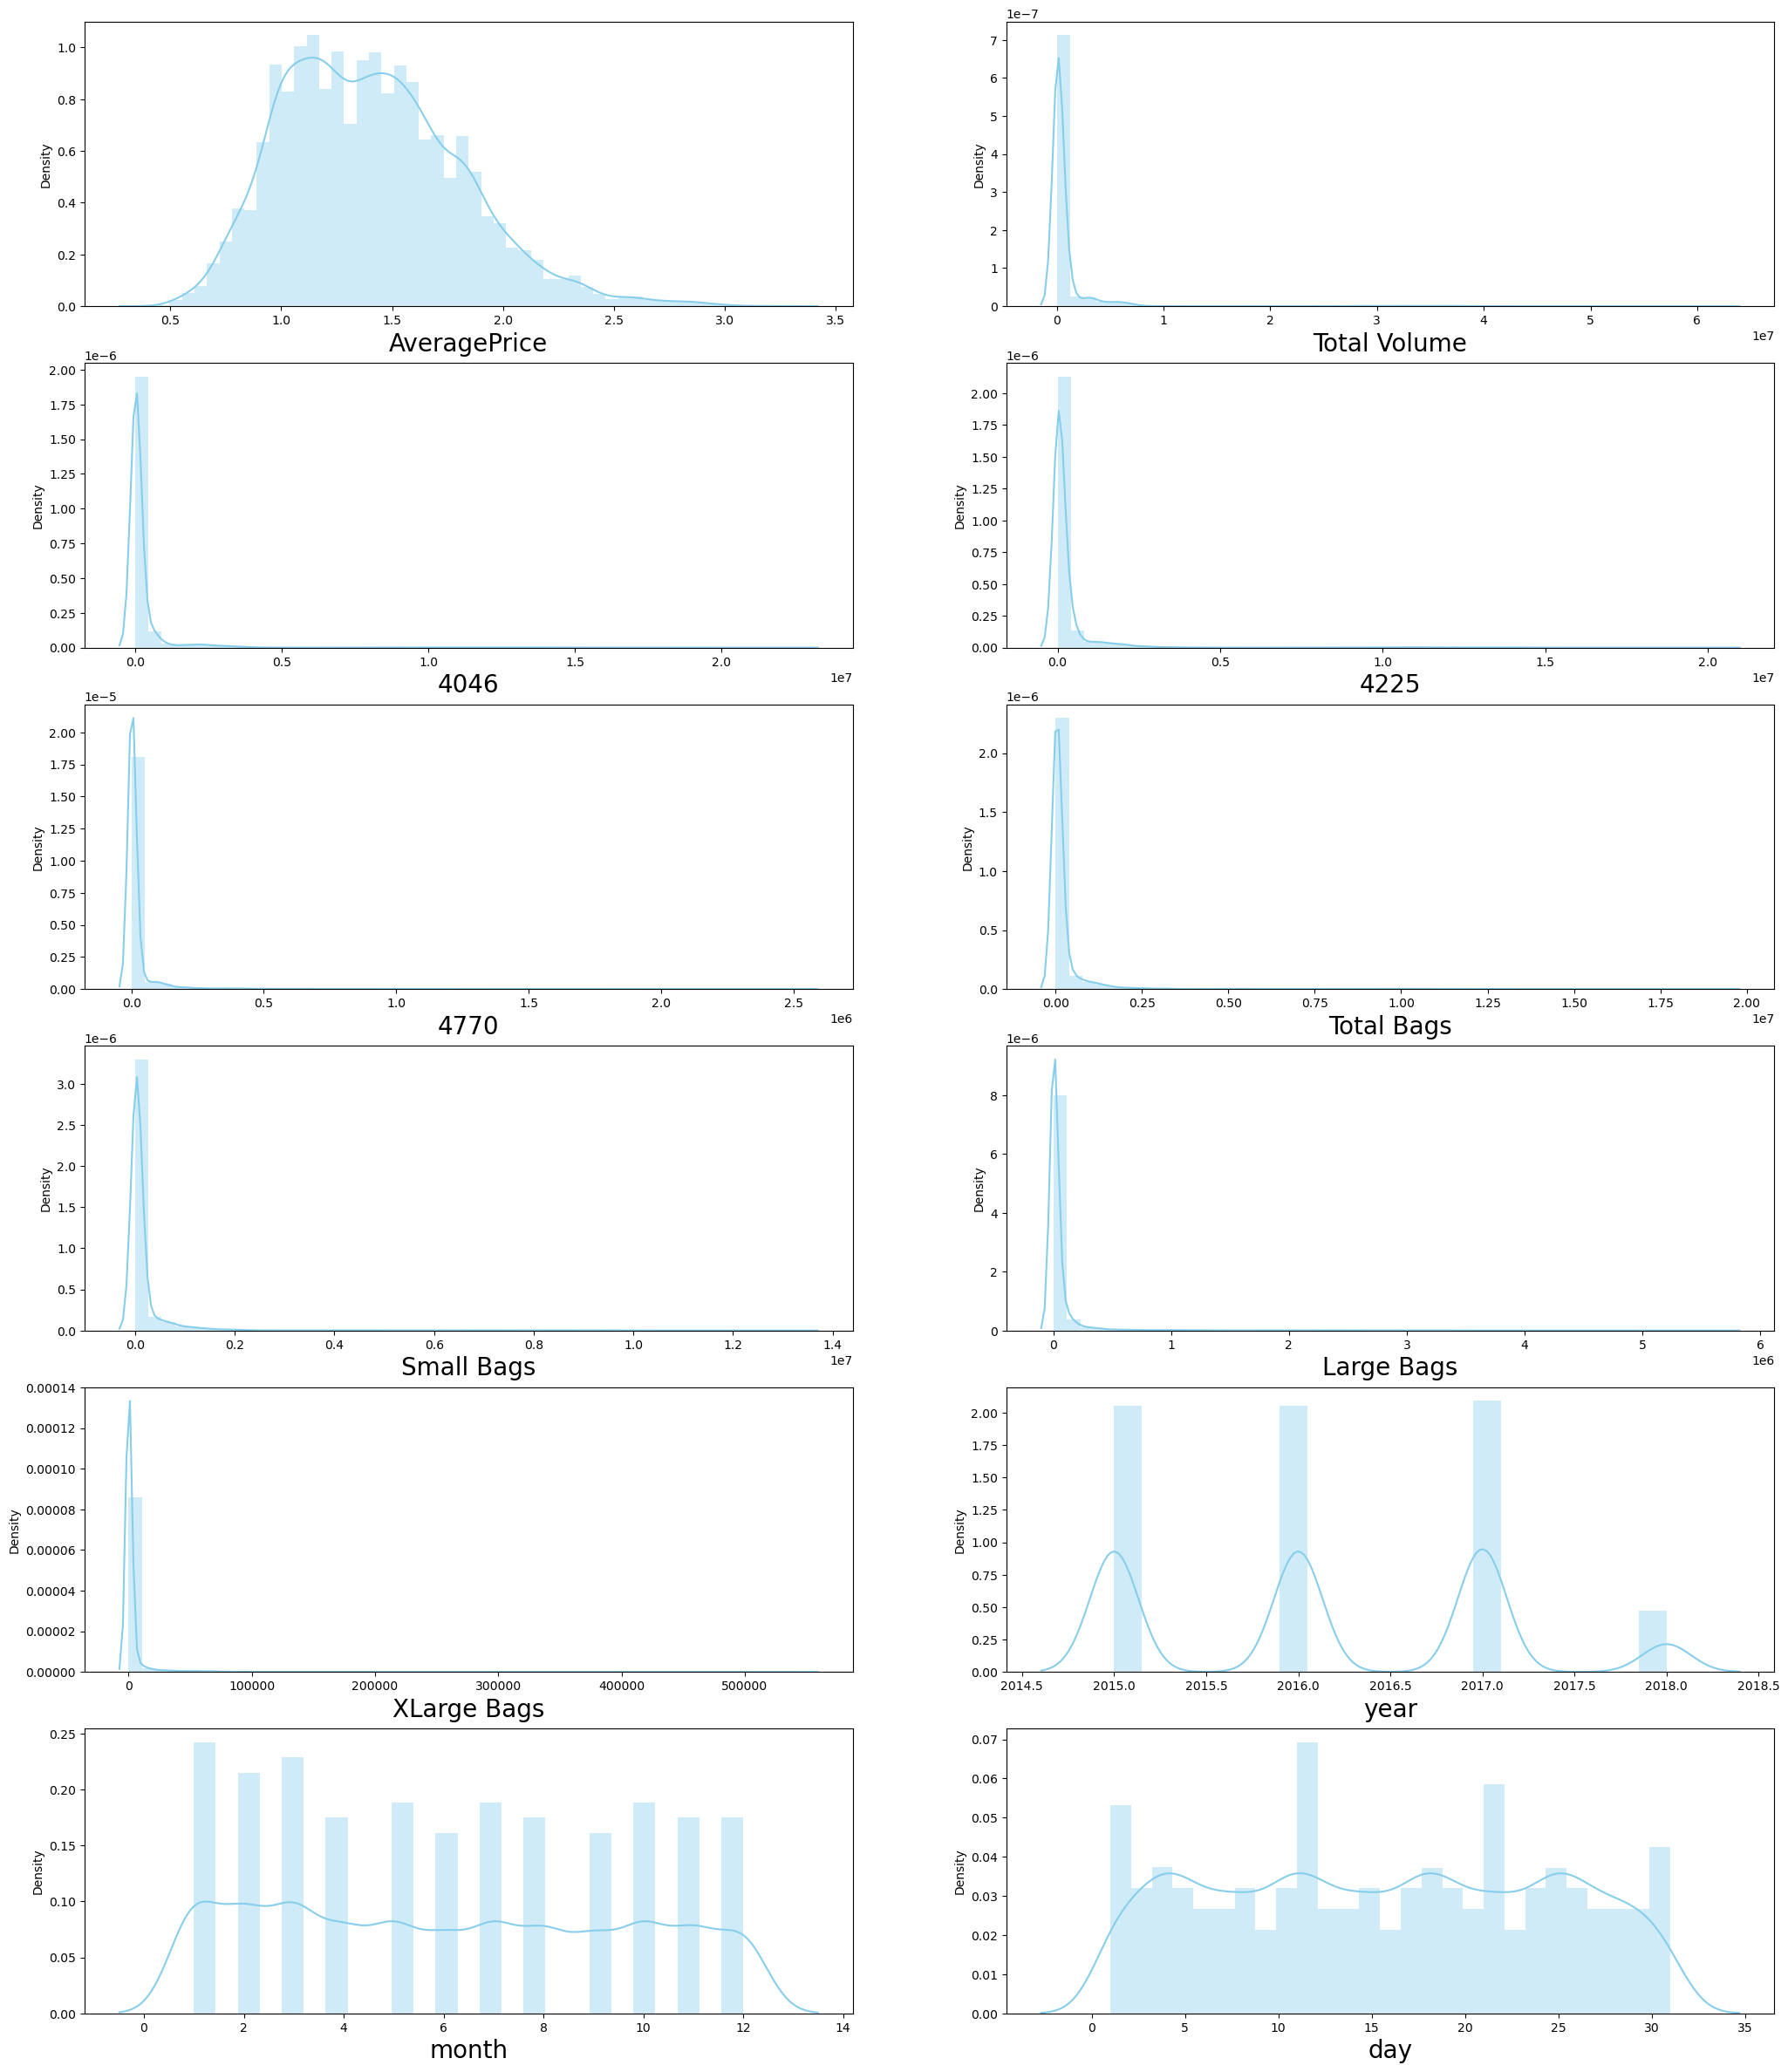

In [39]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

**Plotting Boxplot For seeing Outliers:**

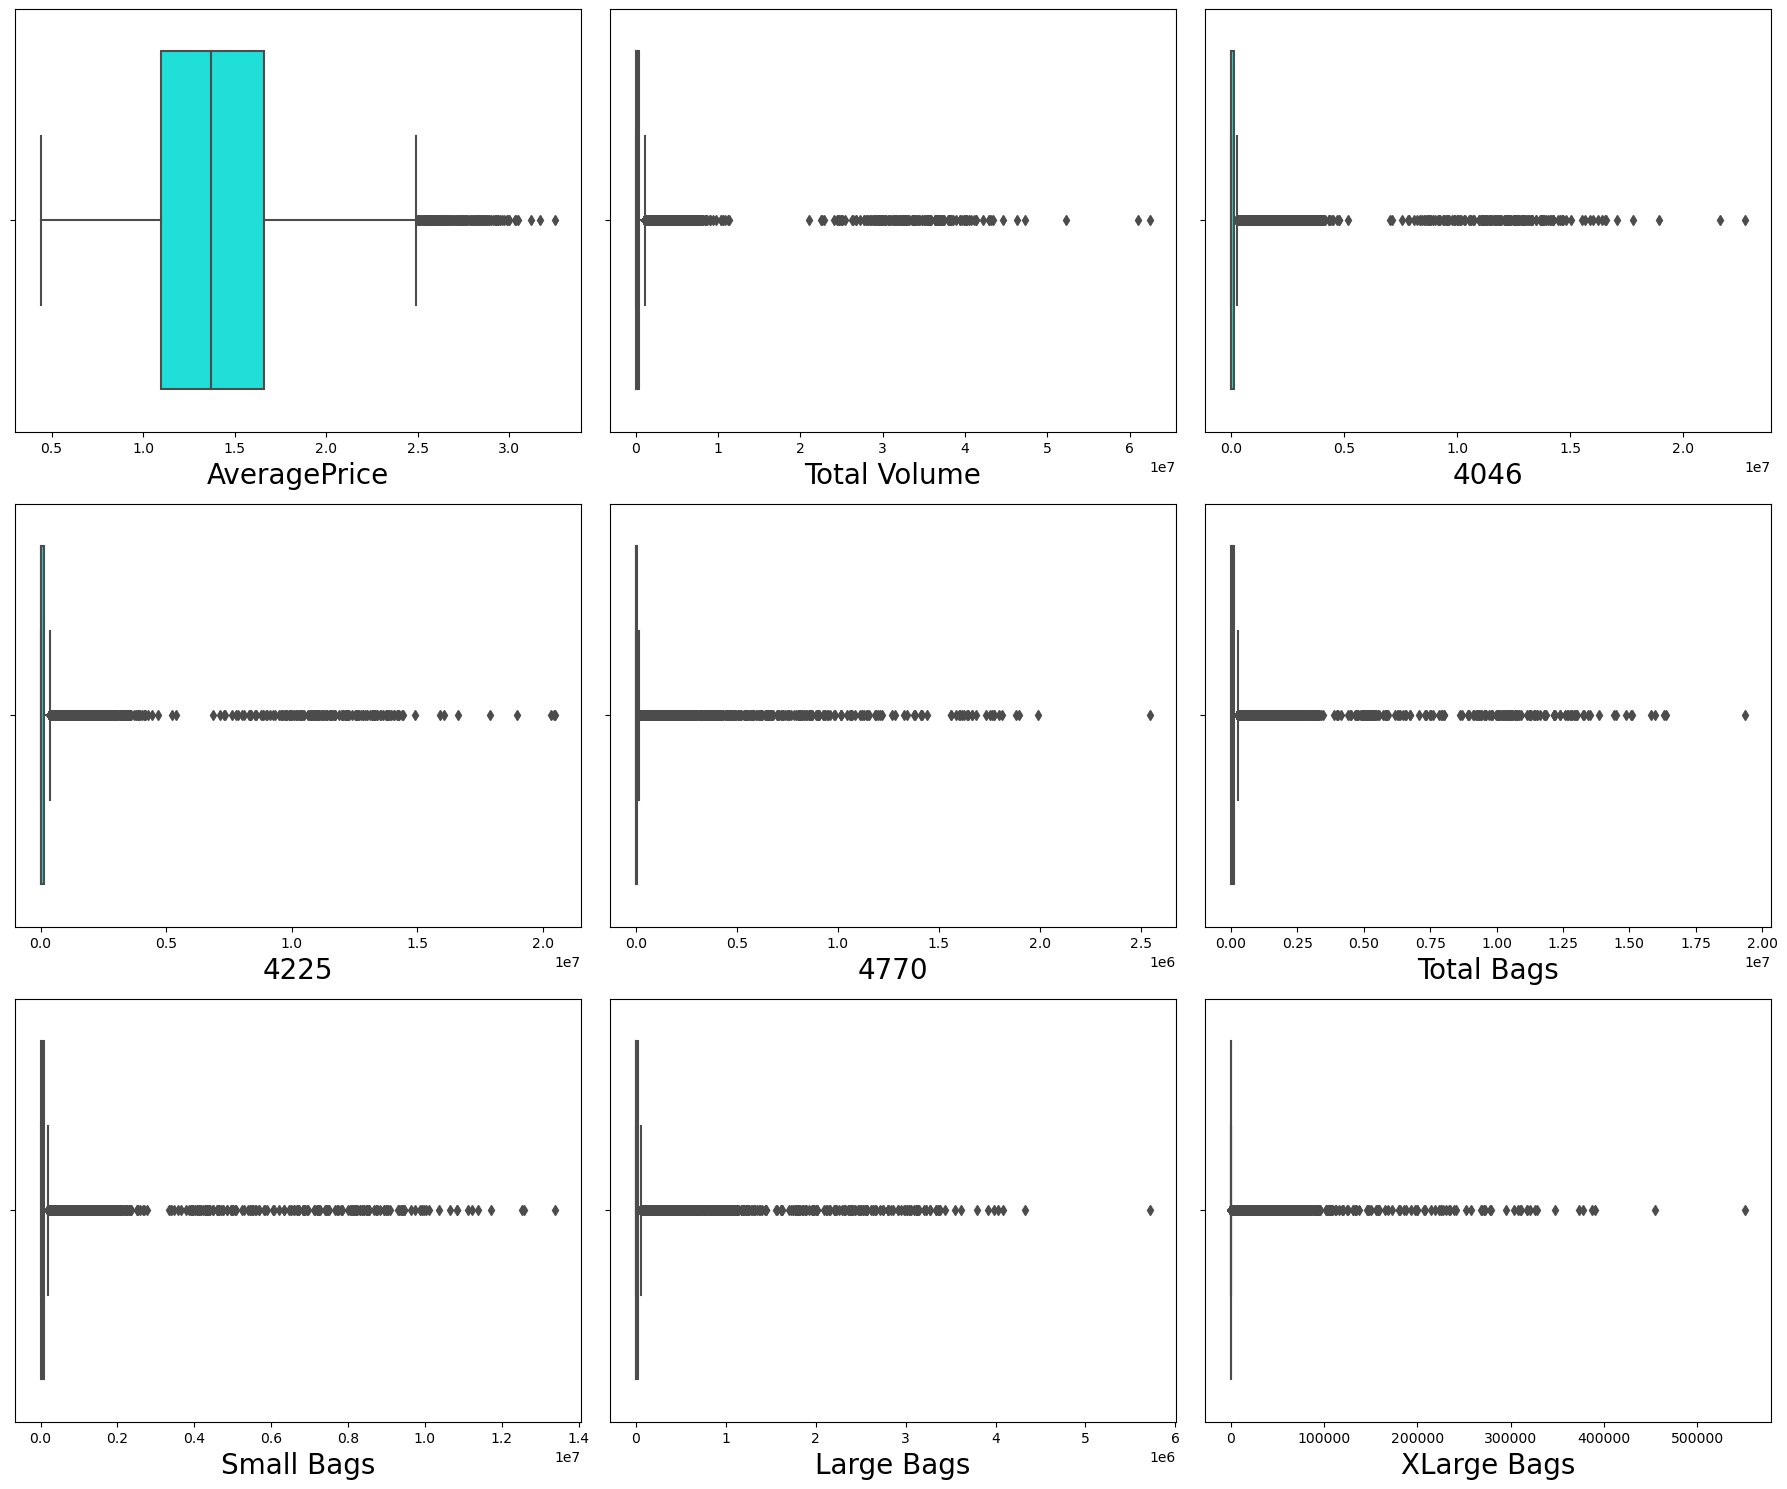

In [40]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in numerical_columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

There are many outliers are present in every column.

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

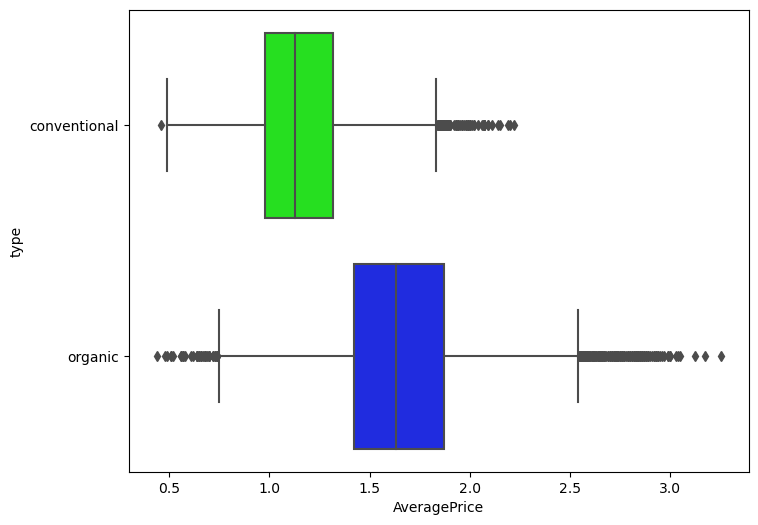

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

**Observation**

* Oraganic Avocado is almost 43% more costlier than conventional Avacado.
* We can see that Average Price of Organic Avocado is higher than Conventional Avocado.
* This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience.Also health cautious and quality oriented people are willing to pay more price for it.

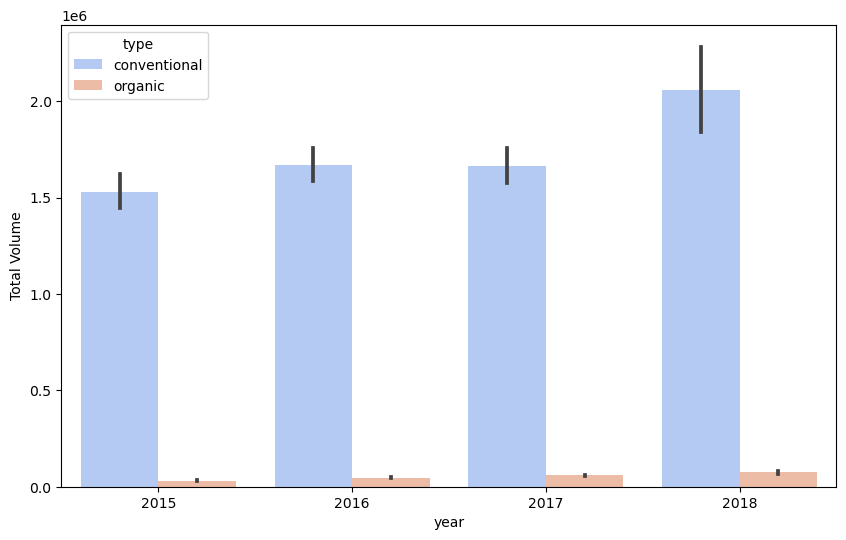

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

**Observation:** 
* The sell of organic avacodo is less than 3 %.
* Conventional Avacado are in more demand.
* Barplot confirm same thing in yearwise sales volume.

The Average price varies over year and season , lets dive to get some more insight over it.

In [43]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [44]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

**Observation:**
* Oraganic Avocado is 40-50% costlier than conventional avacado.
* Avacodo got price hike in year 2017 as result of some reason may be inflation,shortage, more wages.
* Except 2017 each year their is incresase in price of avacado.

In [45]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

In [47]:
# Checking unique values and Yearwise total No of sale entry
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

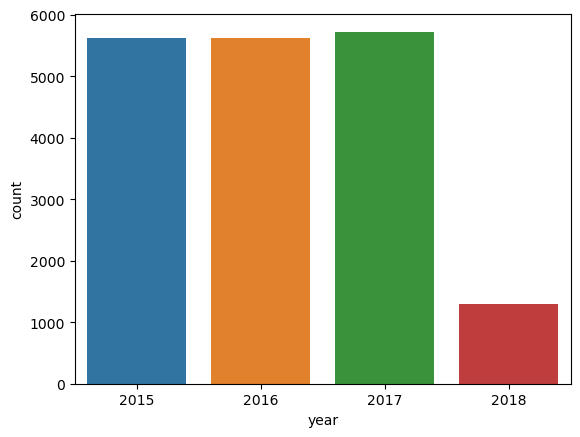

In [48]:
sns.countplot('year',data=df)

* This dataset contain data from 2015 to 2018
* Maximum sales entry belongs to year 2017 while very few sales entry comes from 2018.

### Checking Month-Wise sales entries

<AxesSubplot:xlabel='month', ylabel='count'>

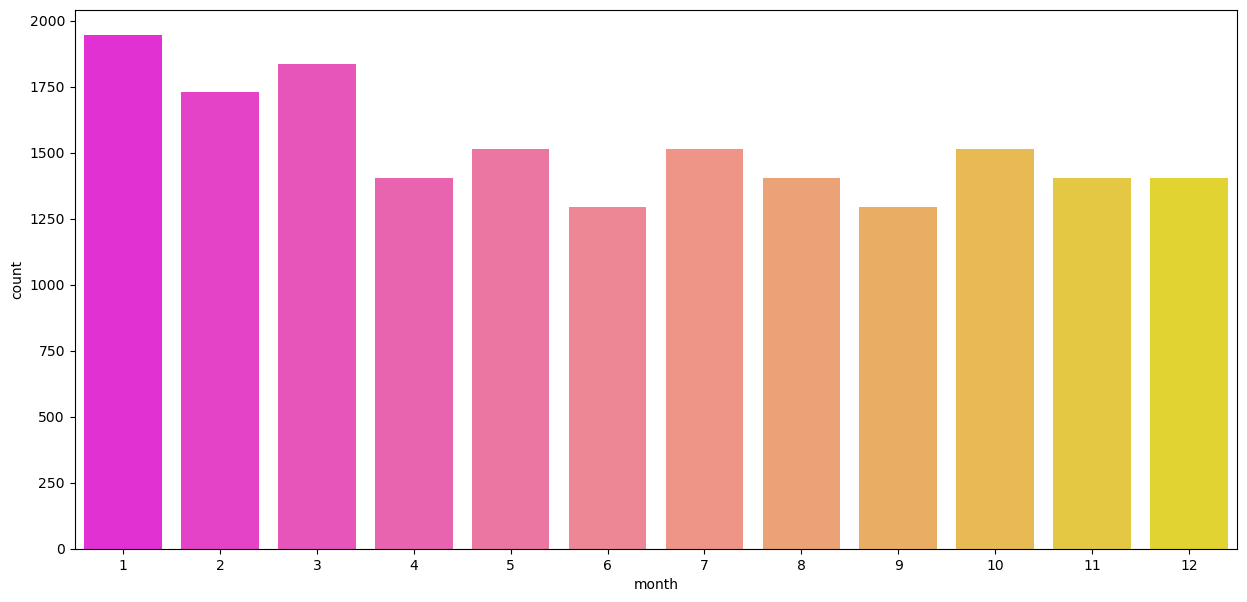

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(x='month', data=df, palette="spring")

* Maximum sales lead comes in month of Jan, Feb, March
* Maximum sales demand of Avacodo is in month of Jan & Minimum sales demand of Avacoda is in month of June

### Checking Month-Wise Variation in Average Price

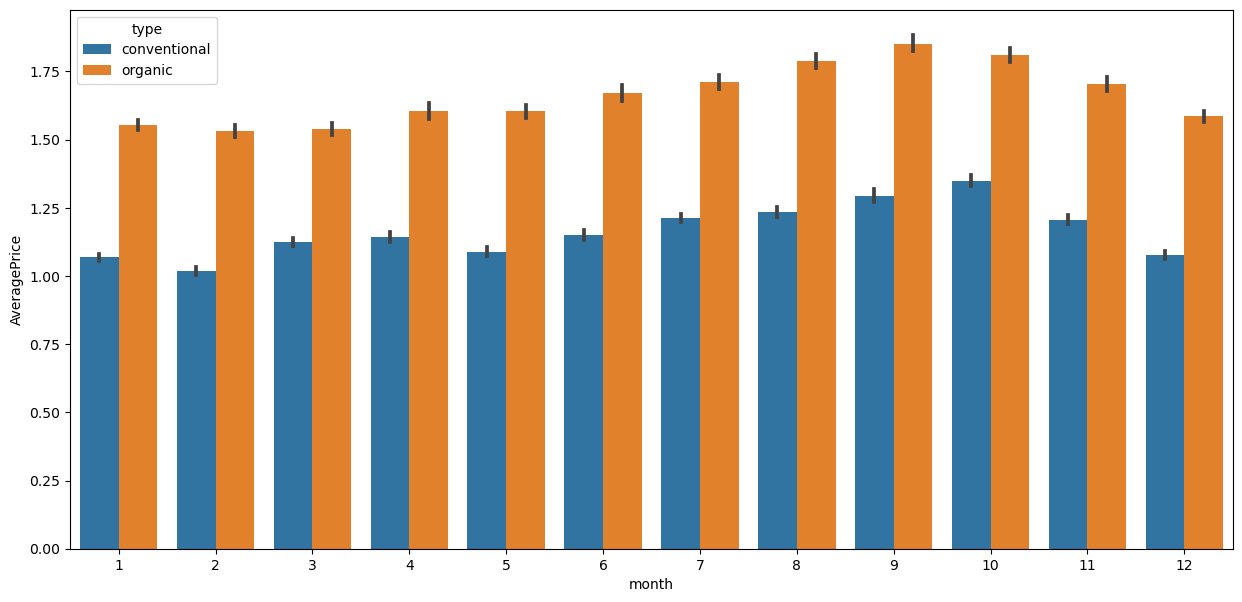

In [52]:
plt.figure(figsize=(15,7))
sns.barplot(x="month", y="AveragePrice", hue='type', data=df)
plt.show()

* In first sight we can see in period of Augest to October price high & in that same time period sales order are minimum.
* Opposite of it true in duration of Jan to March.
* This variation applicable to conventional type while we cannot find such any relation in case of Organic avacado.

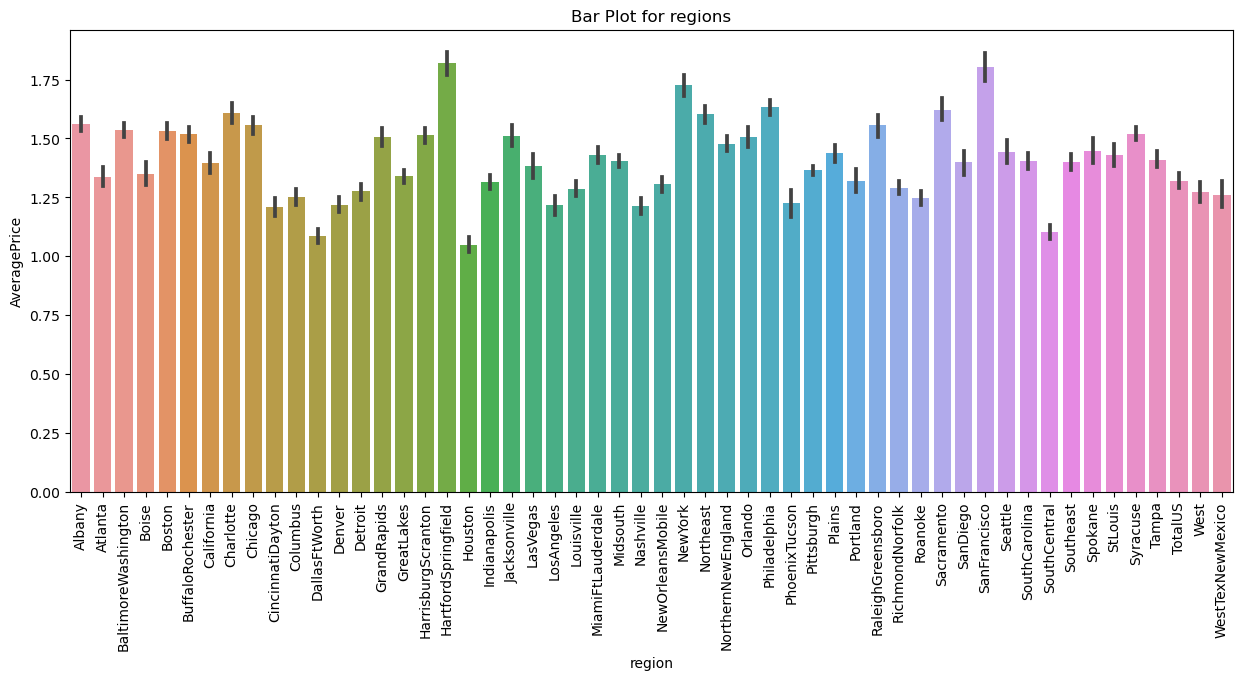

In [53]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['region'],y=df['AveragePrice'], data=df)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

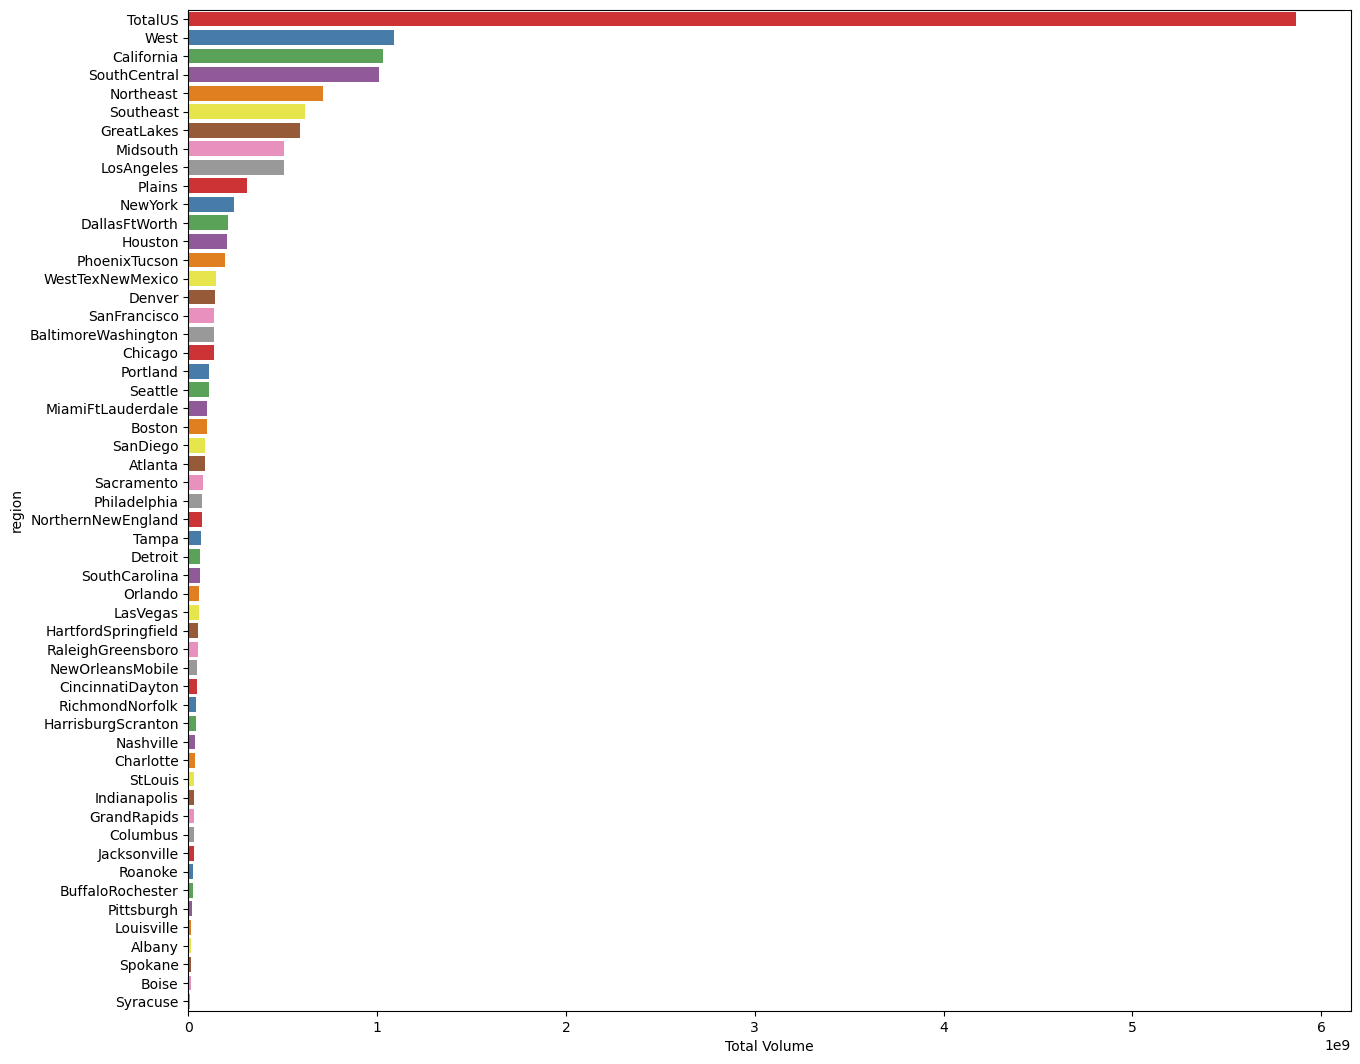

In [54]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

* Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.
* Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston

### MultiVariate Analysis by Pairplot:

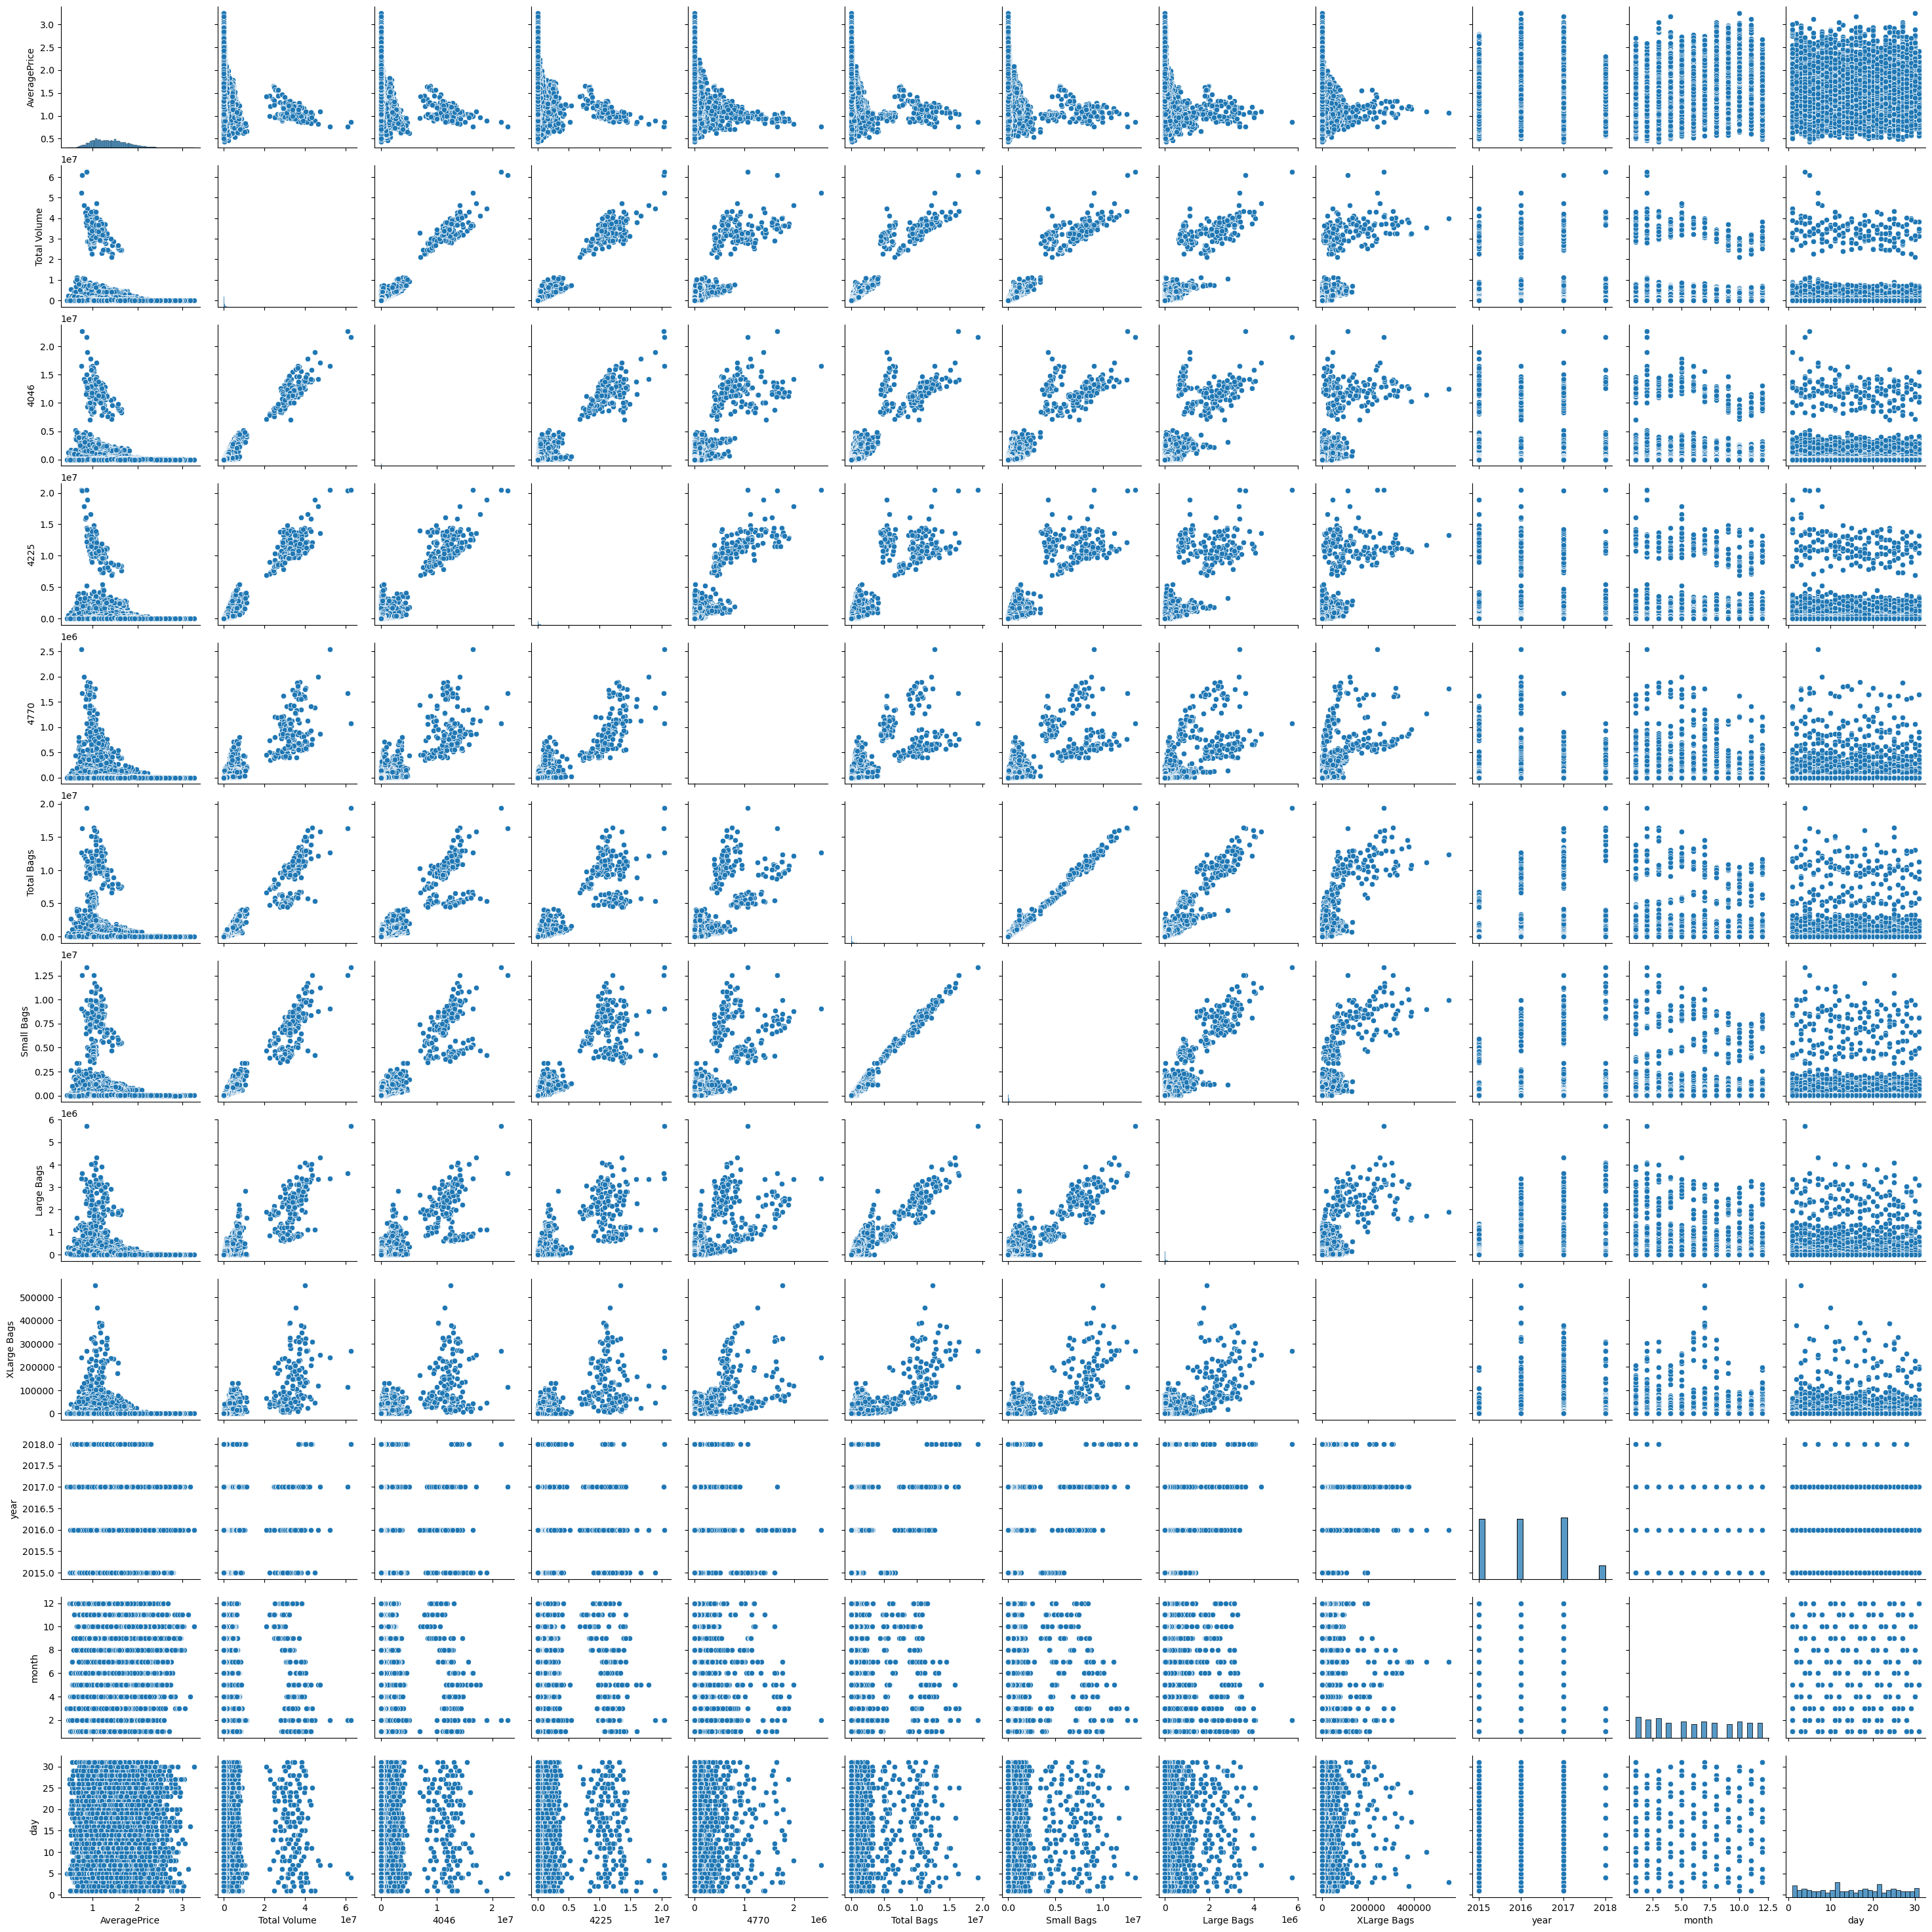

In [55]:
sns.pairplot(df)

### Finding Corelation By using HeatMap:

Text(0.5, 1.0, 'Correlation Factors Heat Map')

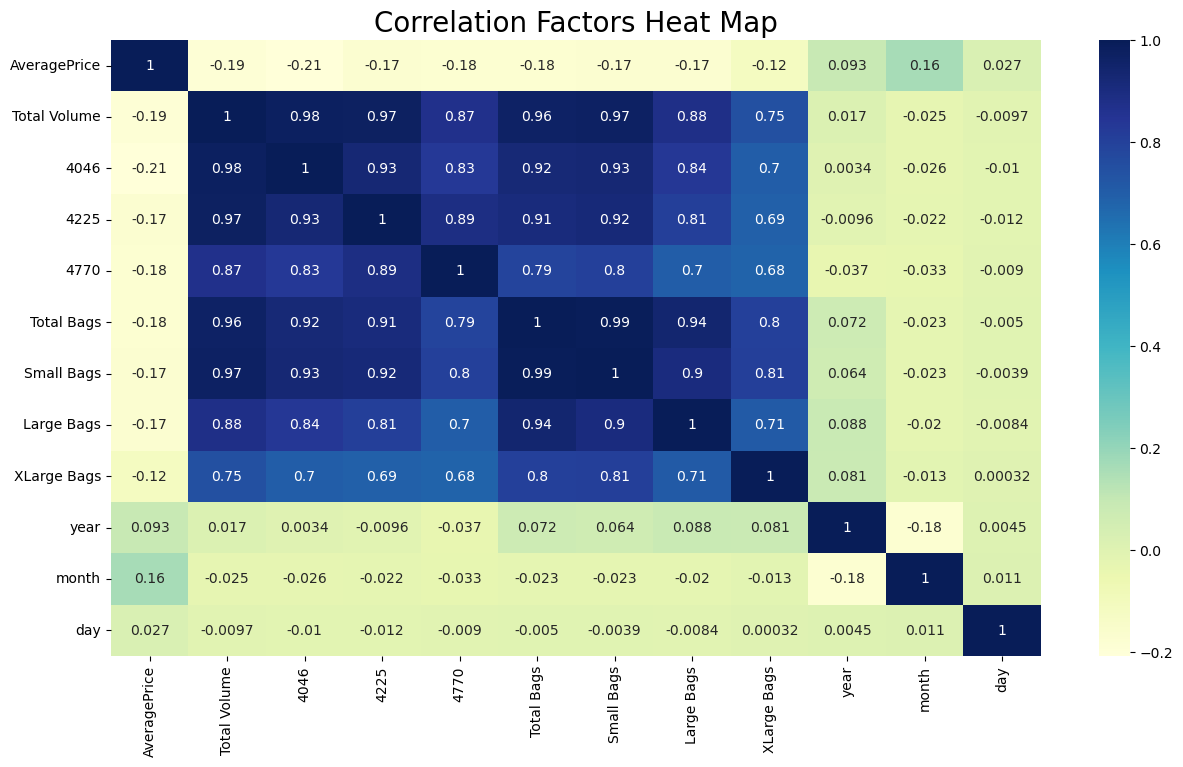

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

### Encoding categorical Data:

In [57]:
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  month  day  
0     8603.62       93.25          0.0     0  2015       0     12   27  
1     9408.07       97.49          0.0     0  2015       0     12   20  
2     8042.21      103.14          0.0     0  2015       0     12   13  
3     5677.40      133.76          0.0     0  2015       0     12    6  
4     5986.26      197.69          0.0     0  2015       0     11   29

Using the Label encoding method we have changed the object datatype columns into numeric values as machine learning models cannot process object data types.

### Using Z Score to remove outliers

In [58]:
z = np.abs(zscore(df))
threshold = 3
df = df[(z<3).all(axis = 1)]

In [59]:
df.shape

(17651, 14)

In [60]:
initial_rows = 18249
rows_after_outlier_removal = 17651

loss_percentage = ((initial_rows - rows_after_outlier_removal) / initial_rows) * 100

print(f"Loss Percentage: {loss_percentage:.2f}%")

Loss Percentage: 3.28%


I have used the Z score method to remove any outlier that we could afford to lose from our original dataset. I see that since there were not many data points removed our new dataset would still have outlier traces but I would like to retain them.

**Here we are copying DataFrame because in this project I have to predict Two Things AveragePrice and Region..**

In [61]:
df1= df.copy()

**In This Project we have to predict two things AveragePrice and Region .**

**First we are predicting AveragePrice.**

**So we will Clean data according to the AveragePrice prediction.**

### Checking Correlation

In [62]:
#correlation with target column
correlation_with_quality = df.corr()['AveragePrice'].abs().sort_values(ascending=False)
print(correlation_with_quality)

AveragePrice    1.000000
type            0.613150
4046            0.333577
Total Volume    0.332056
Total Bags      0.297323
Small Bags      0.275771
Large Bags      0.270915
4225            0.243988
4770            0.243465
XLarge Bags     0.152669
month           0.149502
year            0.091704
day             0.026819
region          0.003242
Name: AveragePrice, dtype: float64


Here we can see that day and region is low correlated with target column so i will delete both of them



In [63]:
df.drop(columns=['region','day',],axis=1, inplace=True)

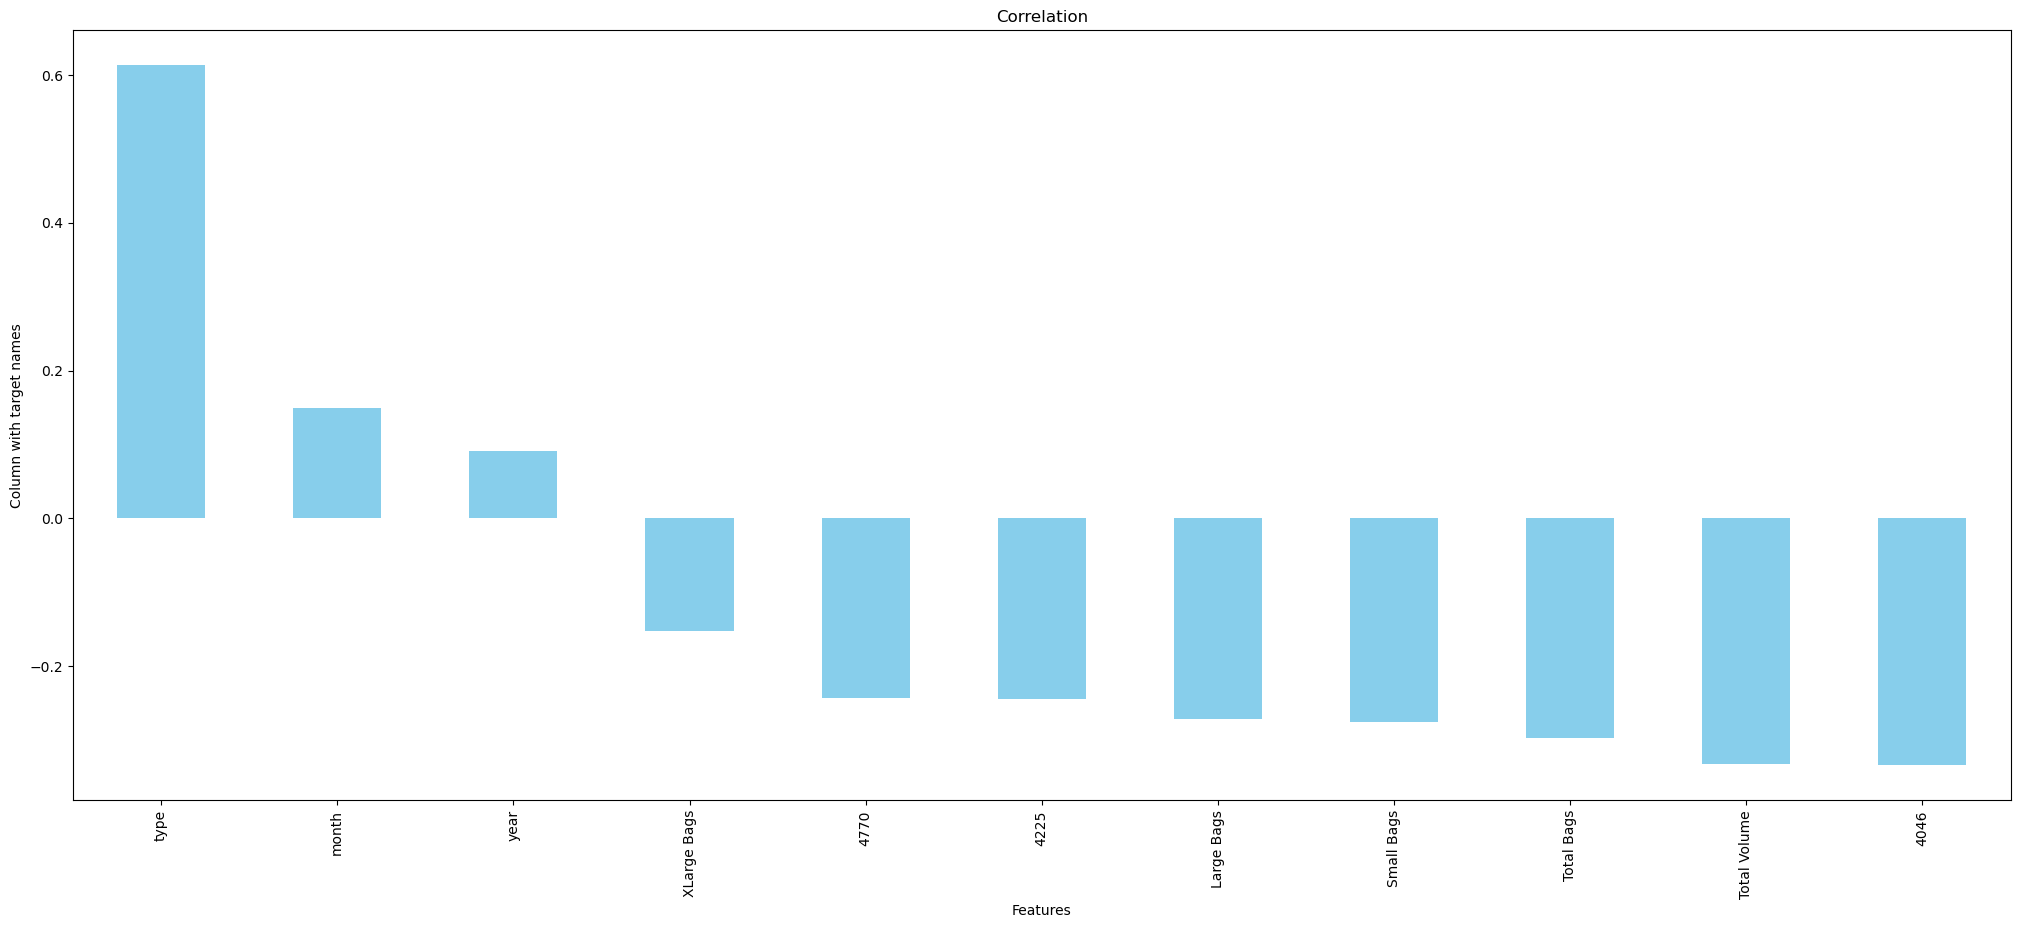

In [64]:
plt.figure(figsize =(25, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

**Checking Correlation of Column with Column.**

In [65]:
#schecking correlation
df_corr = df.corr()
df_corr

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.332056 -0.333577 -0.243988 -0.243465   
Total Volume     -0.332056      1.000000  0.876307  0.871592  0.647518   
4046             -0.333577      0.876307  1.000000  0.565118  0.492127   
4225             -0.243988      0.871592  0.565118  1.000000  0.620221   
4770             -0.243465      0.647518  0.492127  0.620221  1.000000   
Total Bags       -0.297323      0.912184  0.727981  0.757786  0.557980   
Small Bags       -0.275771      0.905648  0.706800  0.778761  0.571512   
Large Bags       -0.270915      0.640642  0.561060  0.451711  0.323747   
XLarge Bags      -0.152669      0.513741  0.415432  0.392030  0.495976   
type              0.613150     -0.415476 -0.341376 -0.383138 -0.321809   
year              0.091704     -0.004866 -0.034636 -0.040234 -0.082054   
month             0.149502     -0.018645 -0.015797 -0.019844 -0.027245   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.297323   -0.275771   -0.270915    -0.152669  0.613150   
Total Volume    0.912184    0.905648    0.640642     0.513741 -0.415476   
4046            0.727981    0.706800    0.561060     0.415432 -0.341376   
4225            0.757786    0.778761    0.451711     0.392030 -0.383138   
4770            0.557980    0.571512    0.323747     0.495976 -0.321809   
Total Bags      1.000000    0.978213    0.746946     0.581690 -0.378205   
Small Bags      0.978213    1.000000    0.593155     0.597700 -0.367593   
Large Bags      0.746946    0.593155    1.000000     0.296864 -0.286813   
XLarge Bags     0.581690    0.597700    0.296864     1.000000 -0.263734   
type           -0.378205   -0.367593   -0.286813    -0.263734  1.000000   
year            0.103442    0.086639    0.119543     0.108209  0.003867   
month          -0.010916   -0.013018   -0.001457     0.002843 -0.009499   

                  year     month  
AveragePrice  0.091704  0.149502  
Total Volume -0.004866 -0.018645  
4046         -0.034636 -0.015797  
4225         -0.040234 -0.019844  
4770         -0.082054 -0.027245  
Total Bags    0.103442 -0.010916  
Small Bags    0.086639 -0.013018  
Large Bags    0.119543 -0.001457  
XLarge Bags   0.108209  0.002843  
type          0.003867 -0.009499  
year          1.000000 -0.175287  
month        -0.175287  1.000000

**Here we are writng function for finding thos columns who are highly correlated with each other.**

In [66]:
correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [67]:
features_to_drop

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [ ]:
df.drop(columns=['4046','4225','Small Bags','Total Bags'],axis=1, inplace=True)

### Variance inflation factor

In [71]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF      Features
0  24.335862  AveragePrice
1   3.578808  Total Volume
2   2.086244          4770
3   2.007790    Large Bags
4   1.557572   XLarge Bags
5   3.649424          type
6  19.892083          year
7   4.213685         month

We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.

In [72]:
df.drop(columns=['year'],axis=1, inplace=True)

### Skewness of features

In [73]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4770            5.117170
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
month           0.107408
dtype: float64

In [74]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

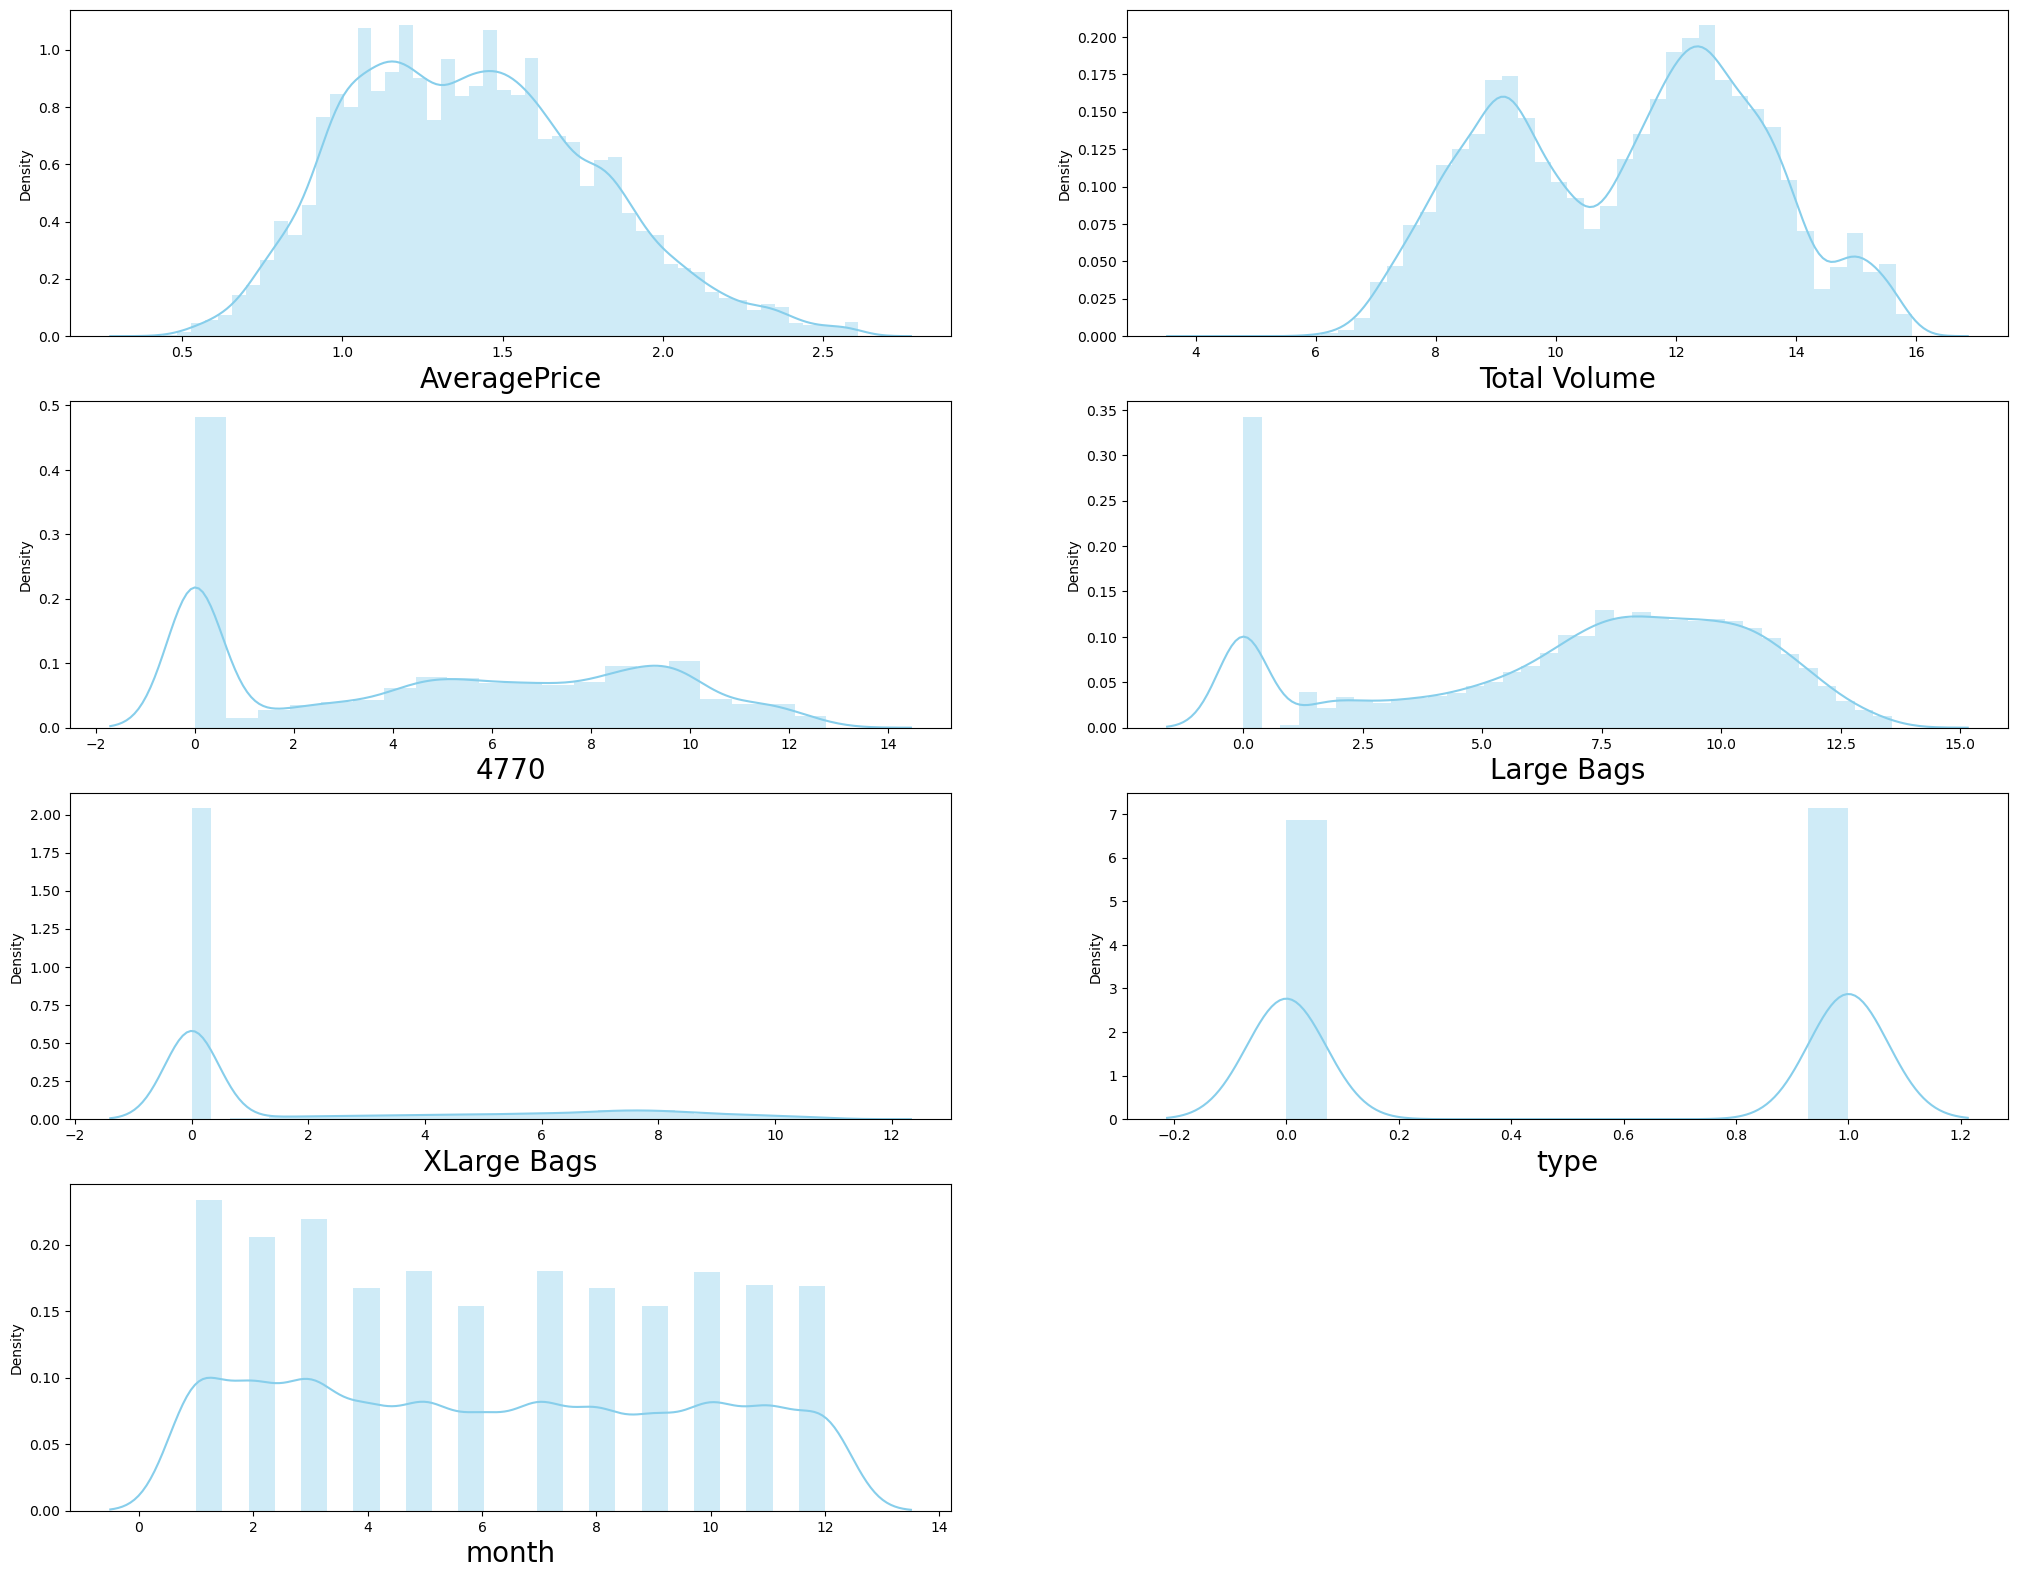

In [75]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

### Splitting the columns into feature and label

In [76]:
X = df.drop("AveragePrice",axis=1)
y = df["AveragePrice"]

### Feature Scaling using Standarad Scalling

In [77]:
std=StandardScaler()
X = pd.DataFrame(std.fit_transform(X), columns=X.columns)

In [78]:
X.head(10)

Total Volume      4770  Large Bags  XLarge Bags      type     month
0     -0.061962 -0.246207   -0.648254    -0.627319 -1.019047  1.644612
1     -0.134302 -0.199437   -0.636520    -0.627319 -1.019047  1.644612
2      0.218235 -0.001478   -0.621646    -0.627319 -1.019047  1.644612
3      0.033021 -0.145897   -0.552915    -0.627319 -1.019047  1.644612
4     -0.167601 -0.135308   -0.449388    -0.627319 -1.019047  1.362113
5     -0.125162 -0.270364   -0.565723    -0.627319 -1.019047  1.362113
6      0.058261 -0.084291   -0.577155    -0.627319 -1.019047  1.362113
7      0.182736 -0.122000   -0.171489    -0.627319 -1.019047  1.362113
8      0.140481 -0.106121   -0.353356    -0.627319 -1.019047  1.362113
9      0.005131 -0.036998   -0.170507    -0.627319 -1.019047  1.079614

# Splitting the data for training and testing

### Finding bset random state

In [80]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.4721646952742765 on Random_state 82


Great so with the help of random state selection process we have found our lucky number to be 82 amongst 1-100

# Creating the training and testing data sets

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=maxRS)

# Model Building and Evaluation

In [82]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [83]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "xgb": XGBRegressor()
}

trained_model_list = []
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    mae,  rmse, r2_square = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score", r2_square)
    r2_list.append(r2_square)

    print('=' * 35)
    print('\n')

Random Forest
Model Training Performance
RMSE: 0.22520057067864102
MAE: 0.16359593202883627
R2 score 0.6594086619598258


Decision Tree
Model Training Performance
RMSE: 0.30405405300253907
MAE: 0.21145211122554067
R2 score 0.3791363710068215


SVR
Model Training Performance
RMSE: 0.2546102492297305
MAE: 0.19512217791432607
R2 score 0.5646421403490587


Linear Regression
Model Training Performance
RMSE: 0.28035086787069935
MAE: 0.2217851468804823
R2 score 0.4721646952742765


KNeighbors Regressor
Model Training Performance
RMSE: 0.23803157974461236
MAE: 0.17579248197734296
R2 score 0.6194920078350766


SGD Regressor
Model Training Performance
RMSE: 0.28021983821830937
MAE: 0.22159931926729418
R2 score 0.4726579765302089


Gradient Boosting
Model Training Performance
RMSE: 0.24979164168416537
MAE: 0.19508352185477587
R2 score 0.5809648737611753


Bagging Regressor
Model Training Performance
RMSE: 0.23352630476125807
MAE: 0.17045262615859938
R2 score 0.6337596083118027


Lasso
Model Train

**Here RandomForest is giving highest accuracy with 65% so we will do hypermetertuning on it to increase its accuracy.**

In [84]:
param_grid = {'n_estimators':[30,60,80],'max_depth': [10,40],
             'min_samples_leaf':[5,10],'criterion':['mse','mae'],
             'max_features':["auto","sqrt"]}

RF = RandomForestRegressor()

grid_search = GridSearchCV(RF, param_grid, cv=3,verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_estimator_.get_params()
best_score = grid_search.best_score_

best_RF = RandomForestRegressor(**best_params)
best_RF.fit(X_train, y_train)
y_pred = best_RF.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression with Hyperparameter Tuning:")
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2*100)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=30; total time=   0.4s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=30; total time=   0.3s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=30; total time=   0.4s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=60; total time=   0.7s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=60; total time=   0.8s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=60; total time=   0.8s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=80; total time=   1.2s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=80; total time=   1.0s
[CV] END criterion=mse, max_depth=

After Hyperparameter Tuning it is giving 65% Accuracy

### Saving Best Model for Predicting AveragePrice

In [85]:
filename = 'Avacado_AveragePrice_best_model.pkl'
pickle.dump(best_RF, open(filename, 'wb'))

# Case-II---Prediction on the basis of Region

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score

Imporeted Nesessary Libraries

In [87]:
df1.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  month  day  
0     8603.62       93.25          0.0     0  2015       0     12   27  
1     9408.07       97.49          0.0     0  2015       0     12   20  
2     8042.21      103.14          0.0     0  2015       0     12   13  
3     5677.40      133.76          0.0     0  2015       0     12    6  
4     5986.26      197.69          0.0     0  2015       0     11   29

### Checking correlation with target column

In [88]:
correlation_with_quality = df1.corr()['region'].abs().sort_values(ascending=False)
print(correlation_with_quality)

region          1.000000
Large Bags      0.127635
4046            0.119067
4770            0.095972
Total Bags      0.085892
Total Volume    0.076676
Small Bags      0.065976
XLarge Bags     0.044338
type            0.018409
4225            0.011002
year            0.004417
AveragePrice    0.003242
month           0.000119
day             0.000046
Name: region, dtype: float64


Here Day Month is vary less correlated with target column so we will delete them

In [89]:
df1.drop(columns=['day','month'],axis=1, inplace=True)
df1.head(2)

AveragePrice  Total Volume     4046      4225   4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85  48.16     8696.87   
1          1.35      54876.98   674.28  44638.81  58.33     9505.56   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8603.62       93.25          0.0     0  2015       0  
1     9408.07       97.49          0.0     0  2015       0

In [90]:
#checking correlation
df1_corr = df1.corr()
df1_corr

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.332056 -0.333577 -0.243988 -0.243465   
Total Volume     -0.332056      1.000000  0.876307  0.871592  0.647518   
4046             -0.333577      0.876307  1.000000  0.565118  0.492127   
4225             -0.243988      0.871592  0.565118  1.000000  0.620221   
4770             -0.243465      0.647518  0.492127  0.620221  1.000000   
Total Bags       -0.297323      0.912184  0.727981  0.757786  0.557980   
Small Bags       -0.275771      0.905648  0.706800  0.778761  0.571512   
Large Bags       -0.270915      0.640642  0.561060  0.451711  0.323747   
XLarge Bags      -0.152669      0.513741  0.415432  0.392030  0.495976   
type              0.613150     -0.415476 -0.341376 -0.383138 -0.321809   
year              0.091704     -0.004866 -0.034636 -0.040234 -0.082054   
region           -0.003242      0.076676  0.119067  0.011002 -0.095972   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.297323   -0.275771   -0.270915    -0.152669  0.613150   
Total Volume    0.912184    0.905648    0.640642     0.513741 -0.415476   
4046            0.727981    0.706800    0.561060     0.415432 -0.341376   
4225            0.757786    0.778761    0.451711     0.392030 -0.383138   
4770            0.557980    0.571512    0.323747     0.495976 -0.321809   
Total Bags      1.000000    0.978213    0.746946     0.581690 -0.378205   
Small Bags      0.978213    1.000000    0.593155     0.597700 -0.367593   
Large Bags      0.746946    0.593155    1.000000     0.296864 -0.286813   
XLarge Bags     0.581690    0.597700    0.296864     1.000000 -0.263734   
type           -0.378205   -0.367593   -0.286813    -0.263734  1.000000   
year            0.103442    0.086639    0.119543     0.108209  0.003867   
region          0.085892    0.065976    0.127635    -0.044338  0.018409   

                  year    region  
AveragePrice  0.091704 -0.003242  
Total Volume -0.004866  0.076676  
4046         -0.034636  0.119067  
4225         -0.040234  0.011002  
4770         -0.082054 -0.095972  
Total Bags    0.103442  0.085892  
Small Bags    0.086639  0.065976  
Large Bags    0.119543  0.127635  
XLarge Bags   0.108209 -0.044338  
type          0.003867  0.018409  
year          1.000000 -0.004417  
region       -0.004417  1.000000

Here we are writing a function for those columns which are highly correlated with each other

In [91]:
correlation_threshold = 0.8
mask = df1_corr.abs() >= correlation_threshold
features_to_drop1 = set()
for i in range(len(df1_corr.columns)):
    for j in range(i+1, len(df1_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df1_corr.columns[i]
            colname_j = df1_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop1.add(colname_j)

In [92]:
features_to_drop1

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [93]:
df1.drop(columns=['4046', '4225', 'Small Bags', 'Total Bags'],axis=1, inplace=True)

### Checking variance_inflation_factor

In [94]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF      Features
0  23.400574  AveragePrice
1   3.630627  Total Volume
2   2.139109          4770
3   2.018180    Large Bags
4   1.561434   XLarge Bags
5   3.595851          type
6  21.548592          year
7   4.087439        region

vif of year is high so we will remove year for avoide multicollinearity

In [95]:
df1.drop(columns=['year'],axis=1, inplace=True)

In [96]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF      Features
0  6.238504  AveragePrice
1  3.603315  Total Volume
2  2.114342          4770
3  2.006016    Large Bags
4  1.560551   XLarge Bags
5  3.378061          type
6  3.576051        region

As the Acceptable range of MultiColinearity is between -10 to 10. now there is no multicollinearity

### Checking skewness

In [97]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4770            5.117170
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
dtype: float64

**Handling skewness by log method:**

In [98]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

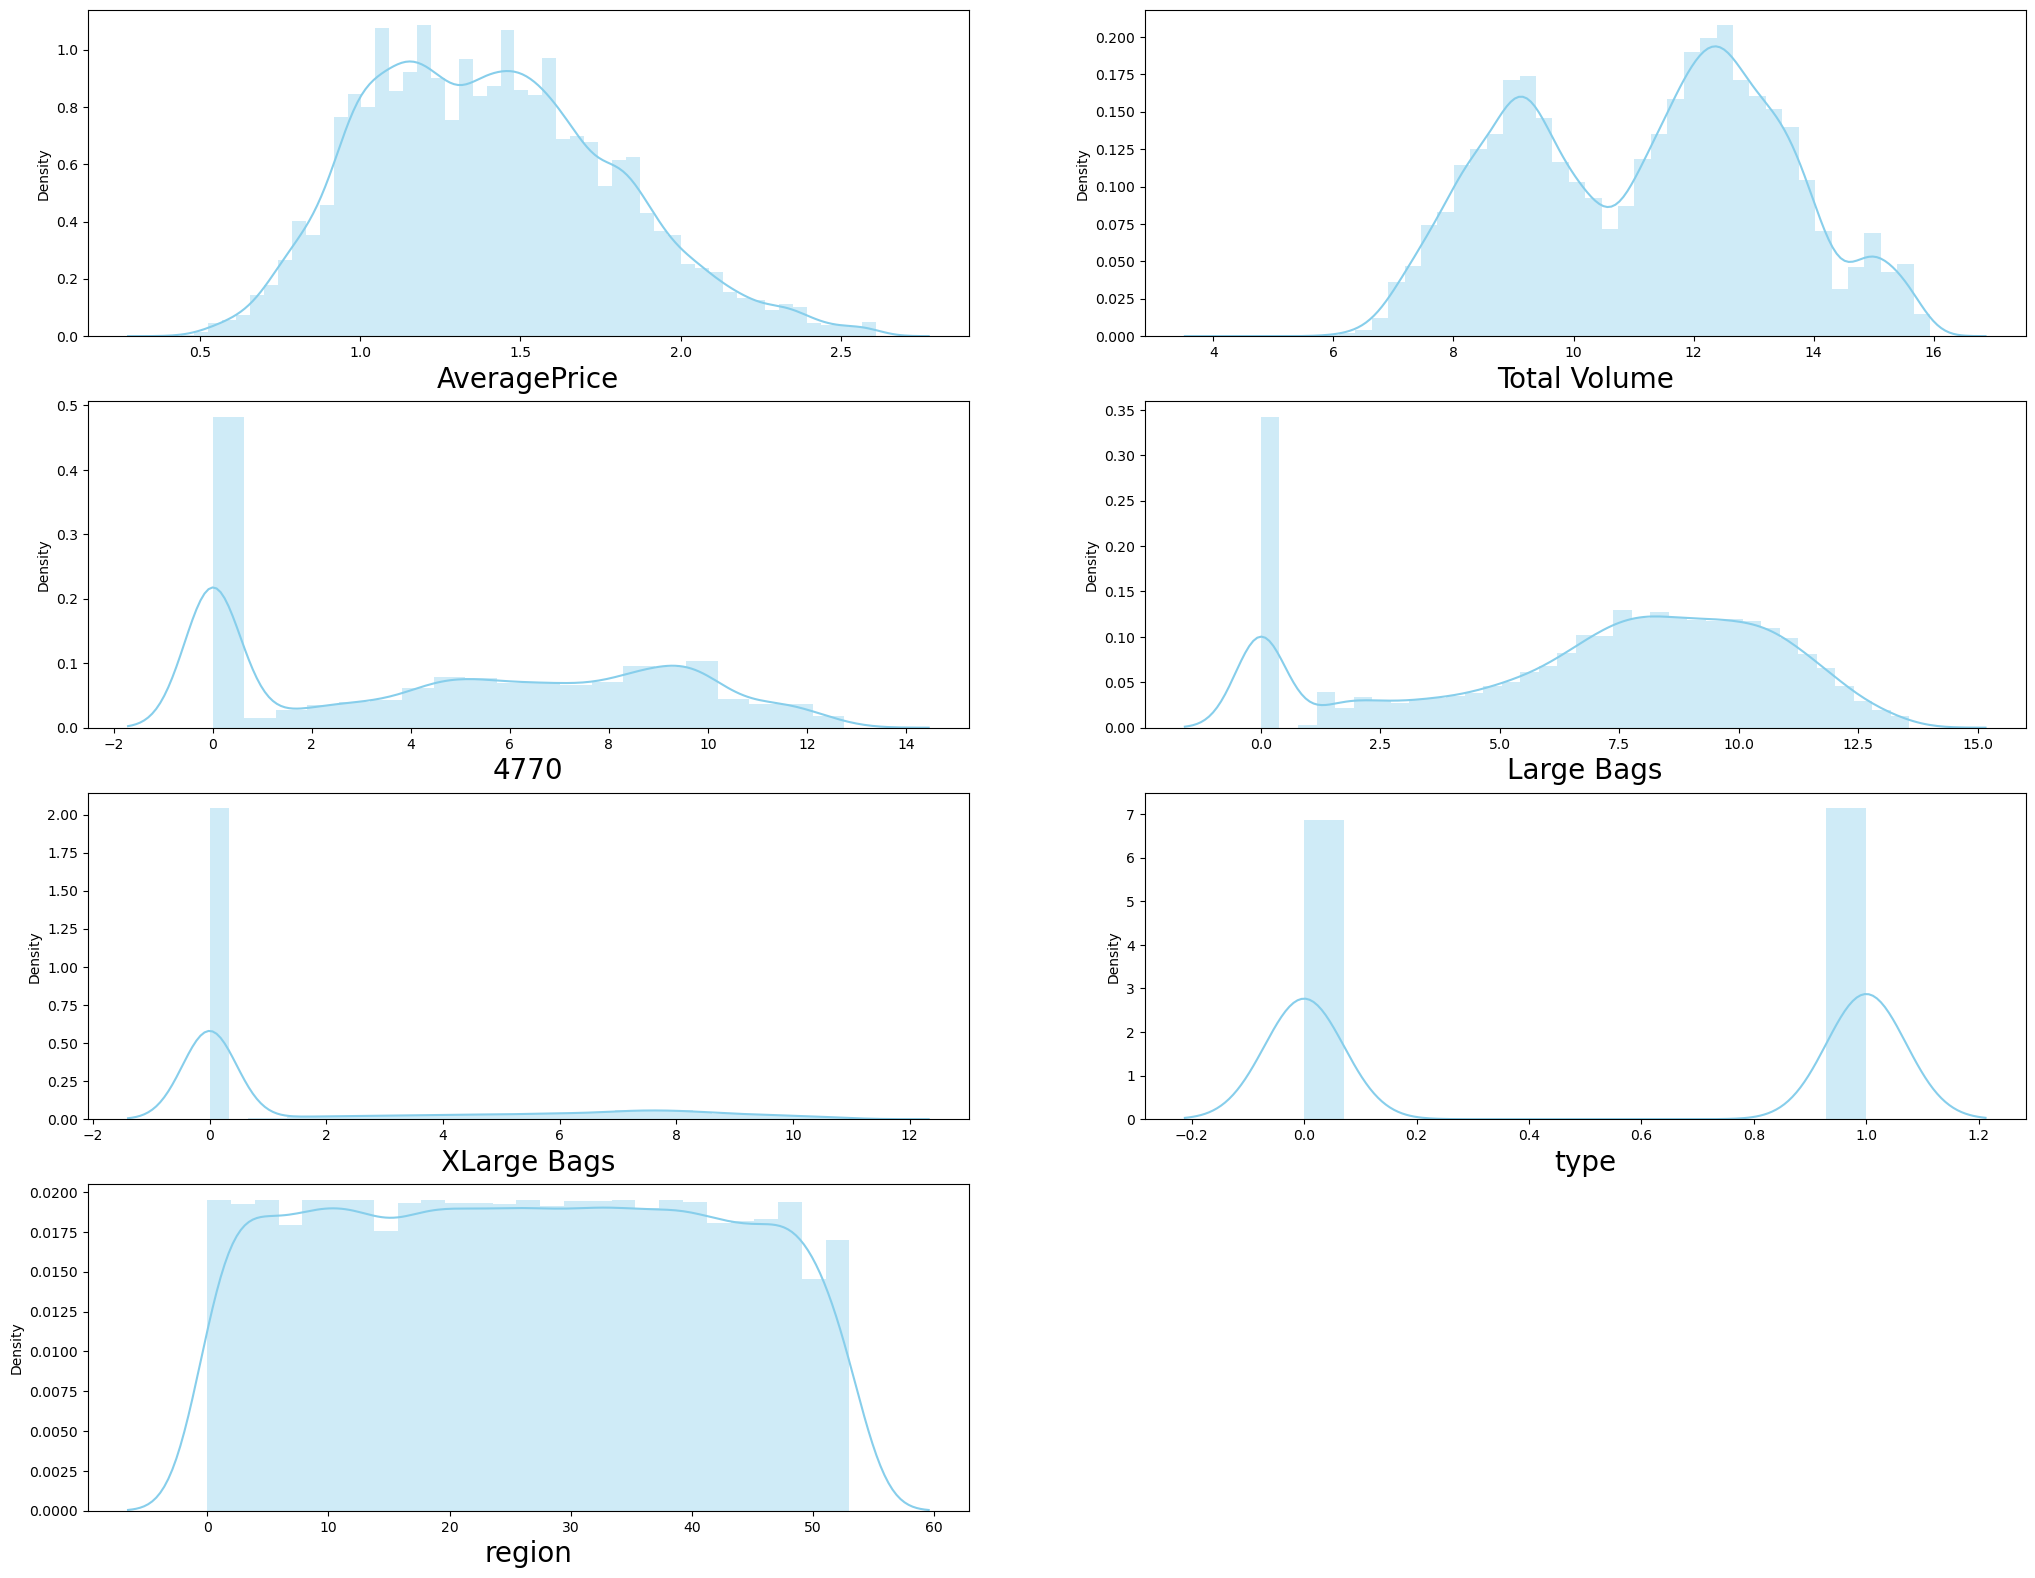

In [99]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df1.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df1[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

### Separating Columns into feature and target column

In [100]:
X1 = df1.drop("region",axis=1)
y1 = df1["region"]

### Scaling Data using StandardScaler

In [101]:
std=StandardScaler()
X1 = pd.DataFrame(std.fit_transform(X1), columns=X1.columns)

### Train test split

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.22,random_state=42)

### ML Model Building and Evaluation:

In [103]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

models = {
    "Random_Forest": RandomForestClassifier(),
    "Decision_Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNeighbors_Classifier": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

trained_model_list = []
model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model Training Performance')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    accuracy_list.append(accuracy)

    print('=' * 35)
    print('\n')


Random_Forest
Model Training Performance
Accuracy: 0.668898043254377
Precision: 0.6733861748128234
Recall: 0.668898043254377
F1 Score: 0.6685468134846069


Decision_Tree
Model Training Performance
Accuracy: 0.5468589083419155
Precision: 0.5503482435666246
Recall: 0.5468589083419155
F1 Score: 0.54688053083725


SVM
Model Training Performance
Accuracy: 0.49279093717816685
Precision: 0.5156114191579538
Recall: 0.49279093717816685
F1 Score: 0.483723332144677


KNeighbors_Classifier
Model Training Performance
Accuracy: 0.588053553038105
Precision: 0.5984796802913458
Recall: 0.588053553038105
F1 Score: 0.5877176103720685


XGBoost
Model Training Performance
Accuracy: 0.6351699279093718
Precision: 0.6402039482420997
Recall: 0.6351699279093718
F1 Score: 0.6349303383748574




**After seeing all the accuracy it is found that random forest is giving high accuracy.**

**Here RandomForestClassifier is giving highest accuracy so we will do hypermetertuning on it to increase its accuracy.**

In [104]:
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 20], 
    'min_samples_leaf': [1, 4],    
    'max_features': ['auto', 'sqrt'],
}

# Create the Random Forest Classifier
rf = RandomForestClassifier()

# Initialize Grid Search with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)

# Perform the Grid Search on your training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters:
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200}
Test Set Accuracy: 0.668898043254377


After hyper parameter tuning accuracy is 66%.

### saving best Classification model

In [105]:
filename = 'Avacado_region_best_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

# PROJECT COMPLETED